### Basic Data Analysis

#### 1.1 Importing the necessary libraries & loading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import requests
from PIL import Image
import pickle
from datetime import datetime
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
#import streamlit as st
#use the below library while displaying the images in jupyter notebook
from IPython.display import display, Image


In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *

     |████████████████████████████████| 720 kB 12.4 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 42.4 MB/s 
     |████████████████████████████████| 189 kB 59.6 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 262 kB/s 


In [ ]:
fastbook.setup_book()


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWi39NZq7salbKabWUOhJXKpC5_jJbsRFuxieTfDTYCR-X7n36FM28s
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d vikashrajluhaniwal/fashion-images

 96% 321M/335M [00:07<00:00, 33.3MB/s]
100% 335M/335M [00:07<00:00, 46.2MB/s]


In [ ]:
!unzip \*.zip &&*.zip

Archive:  fashion-images.zip
  inflating: data/Apparel/Boys/Images/images_with_product_ids/10054.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/10649.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/10671.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/12840.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/12844.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/12845.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/12846.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/12847.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/13306.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/13343.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/15044.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/15045.jpg  
  inflating: data/Apparel/Boys/Images/images_with_product_ids/15046.jpg  
  inflati

In [ ]:
fashion_df = pd.read_csv("/content/data/fashion.csv")
fashion_df

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/properties/f3964f76c78edd85f4512d98b26d52e9_images.jpg
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/properties/dce310e4c15223a6c964631190263284_images.jpg
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/properties/fc3c1b46906d5c148c45f532d0b3ffb5_images.jpg
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/properties/ef9685293a987f515492addd034006bf_images.jpg
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/properties/5158808a5bdd60c8c8af6999f8481160_images.jpg
...,...,...,...,...,...,...,...,...,...,...
2901,51755,Women,Footwear,Shoes,Casual Shoes,Black,Casual,Catwalk Women Black Shoes,51755.jpg,http://assets.myntassets.com/v1/images/style/properties/d4411f7d3aa07b5eebc643c0c201278d_images.jpg
2902,47630,Women,Footwear,Shoes,Flats,Blue,Casual,Carlton London Women Blue Shoes,47630.jpg,http://assets.myntassets.com/v1/images/style/properties/2d1da3039627b117189418a3b0dc4861_images.jpg
2903,32836,Women,Footwear,Shoes,Flats,Pink,Casual,Grendha Women Flori Pink Sandals,32836.jpg,http://assets.myntassets.com/v1/images/style/properties/79b5bddd0de2715c41c8c7041c6a7c7b_images.jpg
2904,35821,Women,Footwear,Shoes,Heels,Black,Casual,Enroute Women Black Heels,35821.jpg,http://assets.myntassets.com/v1/images/style/properties/c181bb929510db812d888933a449c612_images.jpg


#### 1.2 Basic statistics - Number of products, subcategories & gender

In [ ]:
print("Total number of products : ", fashion_df.shape[0])
print("Total number of unique subcategories : ", fashion_df["SubCategory"].nunique())
print("Total number of unique gender types : ", fashion_df["Gender"].nunique())

Total number of products :  2906
Total number of unique subcategories :  9
Total number of unique gender types :  4


#### 1.3 Frequency of each gender

In [ ]:
fashion_df["Gender"].value_counts()

Men      811
Women    769
Boys     759
Girls    567
Name: Gender, dtype: int64

#### 1.4 Distribution of products gender-wise

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


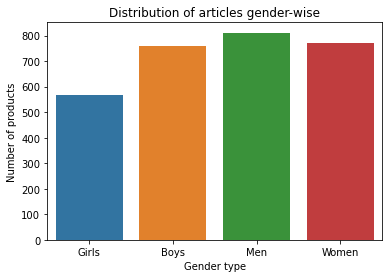

In [ ]:
plot = sns.countplot(fashion_df["Gender"])
plt.title("Distribution of articles gender-wise")
plt.xlabel("Gender type")
plt.ylabel("Number of products")
plot.set_xticklabels(plot.get_xticklabels())
plt.show()

### 2. Data Preparation

In [ ]:
apparel_boys = fashion_df[fashion_df["Gender"]=="Boys"]
apparel_girls = fashion_df[fashion_df["Gender"]=="Girls"]
footwear_men = fashion_df[fashion_df["Gender"]=="Men"]
footwear_women = fashion_df[fashion_df["Gender"]=="Women"]

### 3. Feature extraction using ResNet

**For Gender - Men**

In [ ]:
img_width, img_height = 224, 224

#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/kaggle/input/fashion-images/data/Footwear/Men/Images/"

nb_train_samples = 811
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((811, 100352))
    
    np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

94773248/94765736 [==============================] - 1s 0us/step
Found 811 images belonging to 1 classes.


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time taken in feature extraction 0:01:44.087027


### 4. Computing the Euclidean distance and recommending similar products

#### 4.1 Loading the extracted features

In [ ]:
extracted_features = np.load('/kaggle/working/Men_ResNet_features.npy')
Productids = np.load('/kaggle/working/Men_ResNet_feature_product_ids.npy')
men = footwear_men.copy()
#men = pd.read_csv('./footwear_men.csv')
df_Productids = list(men['ProductId'])
Productids = list(Productids)

#### 4.2 Distance computation and Recommendation

==================== input product image ====================


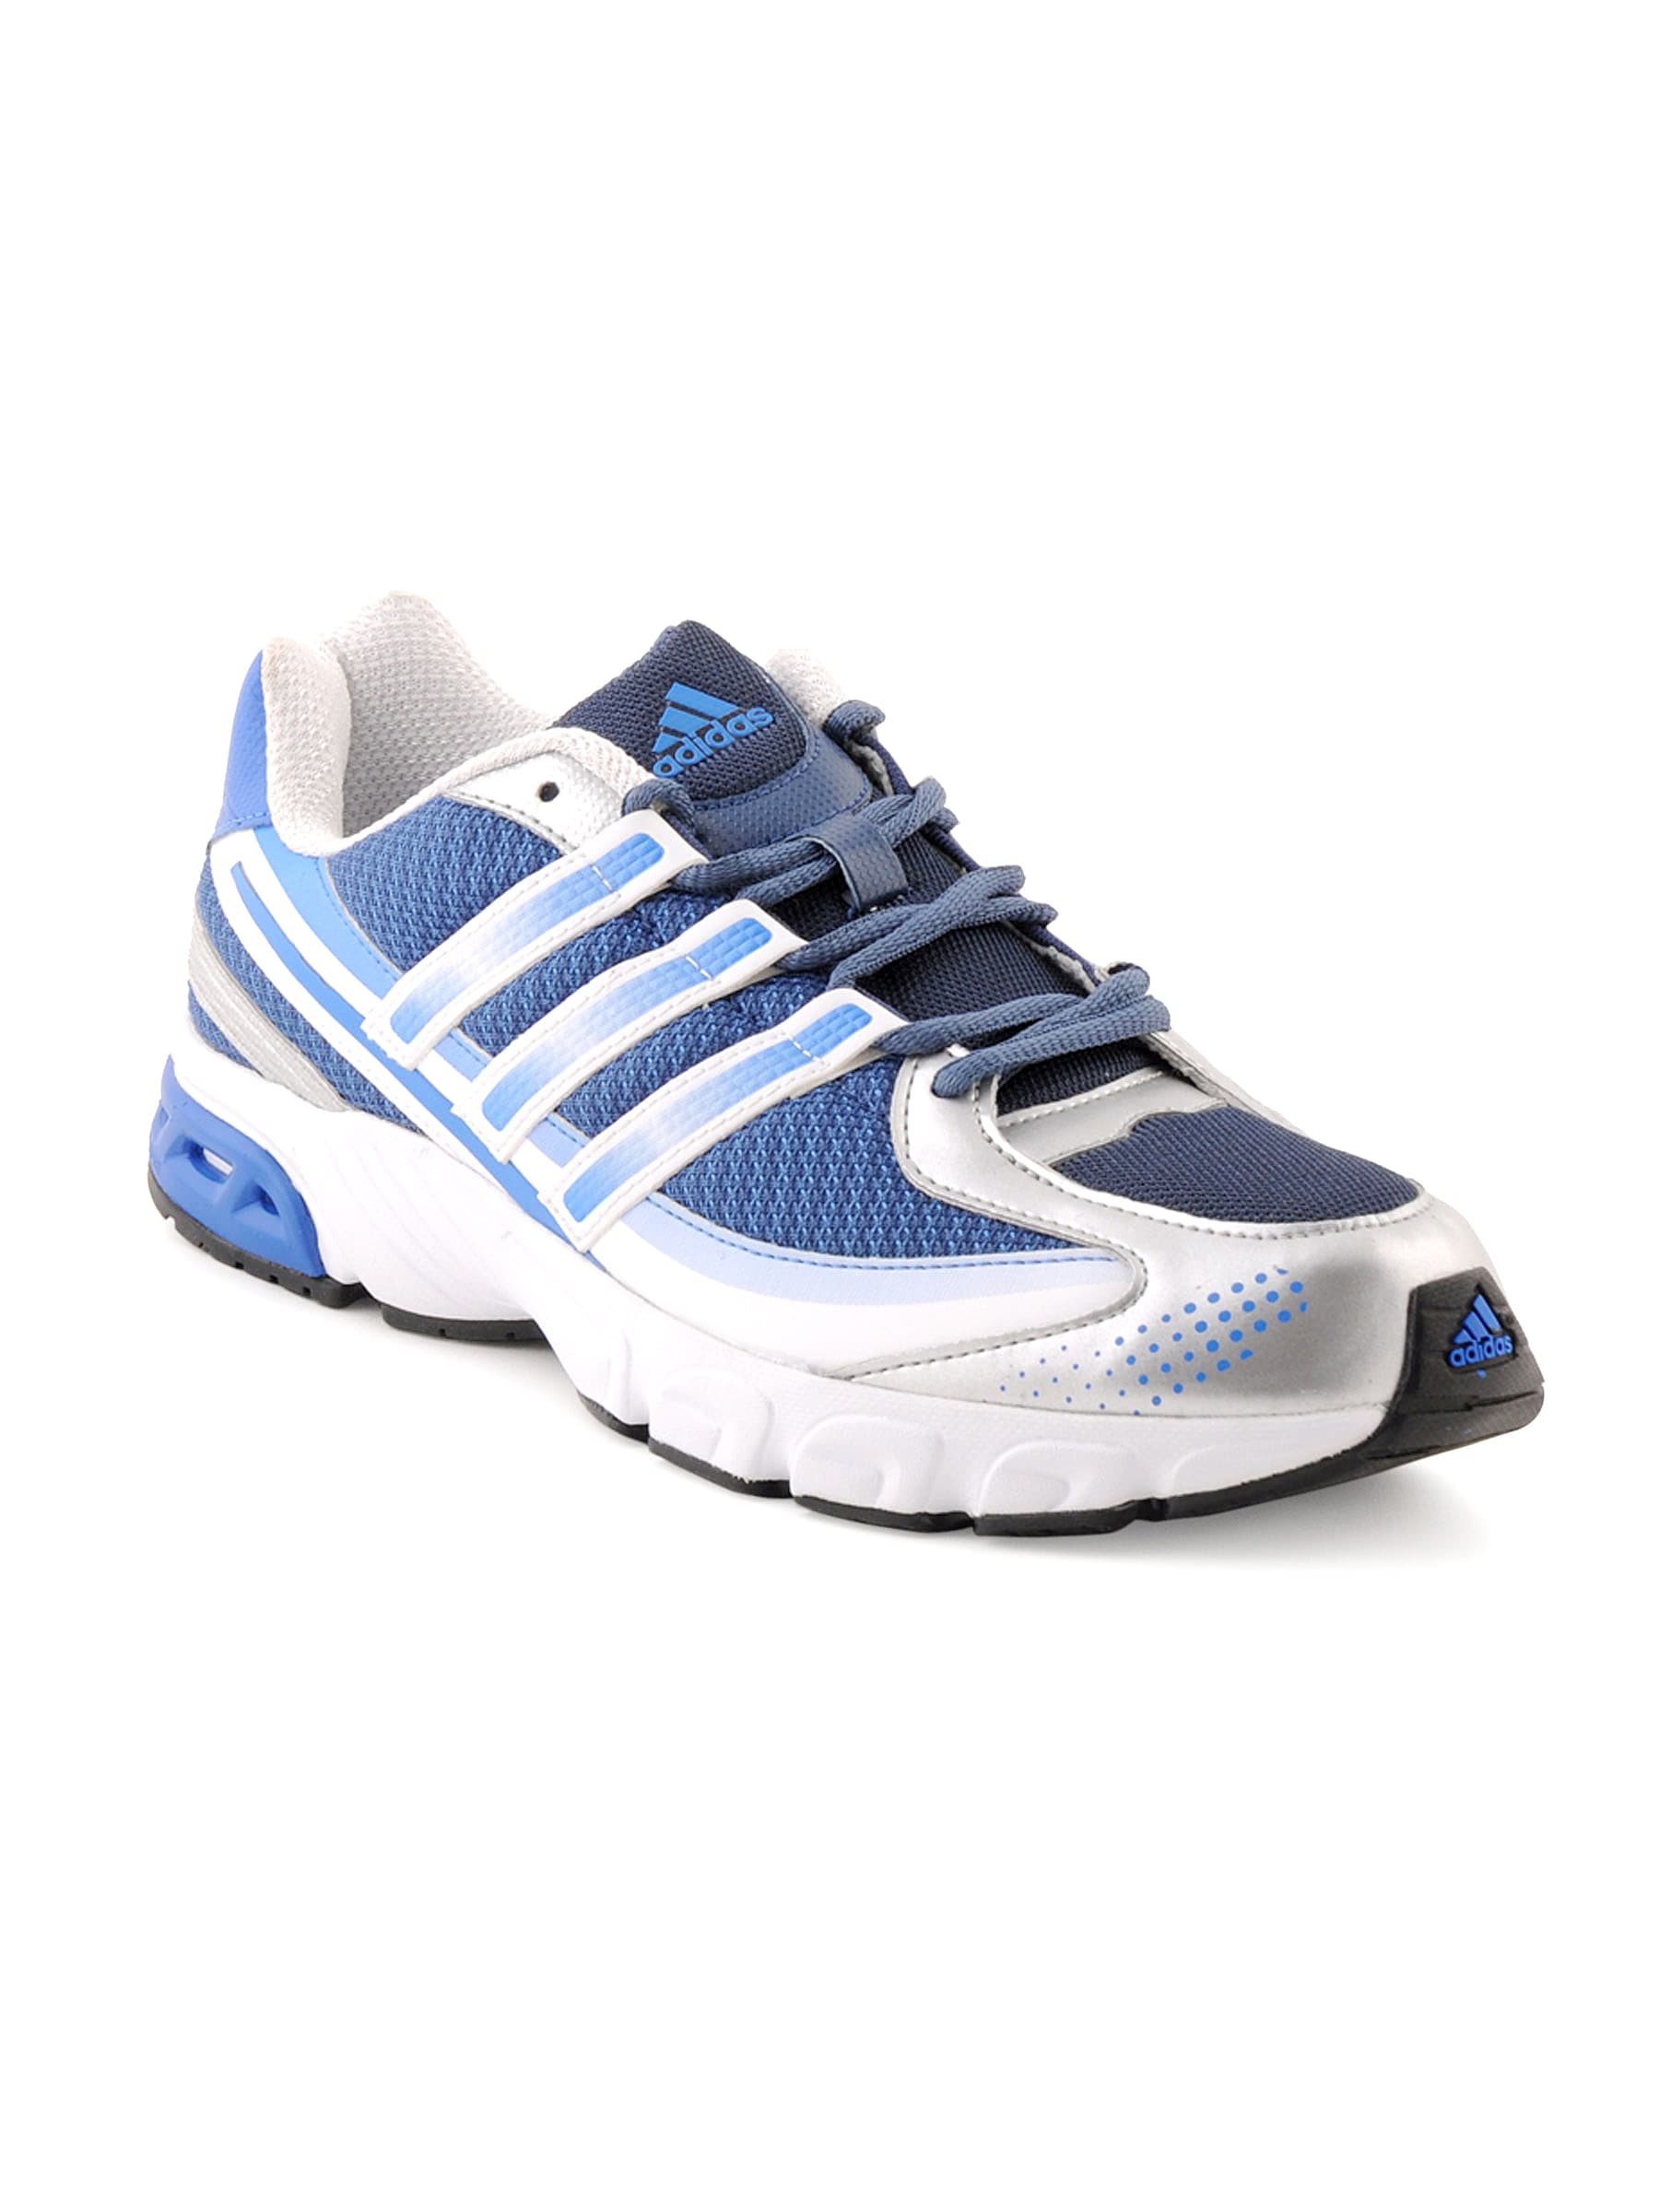

Product Title:  ADIDAS Men Adi Quest Blue Sports Shoes

 ==================== Recommended products ====================


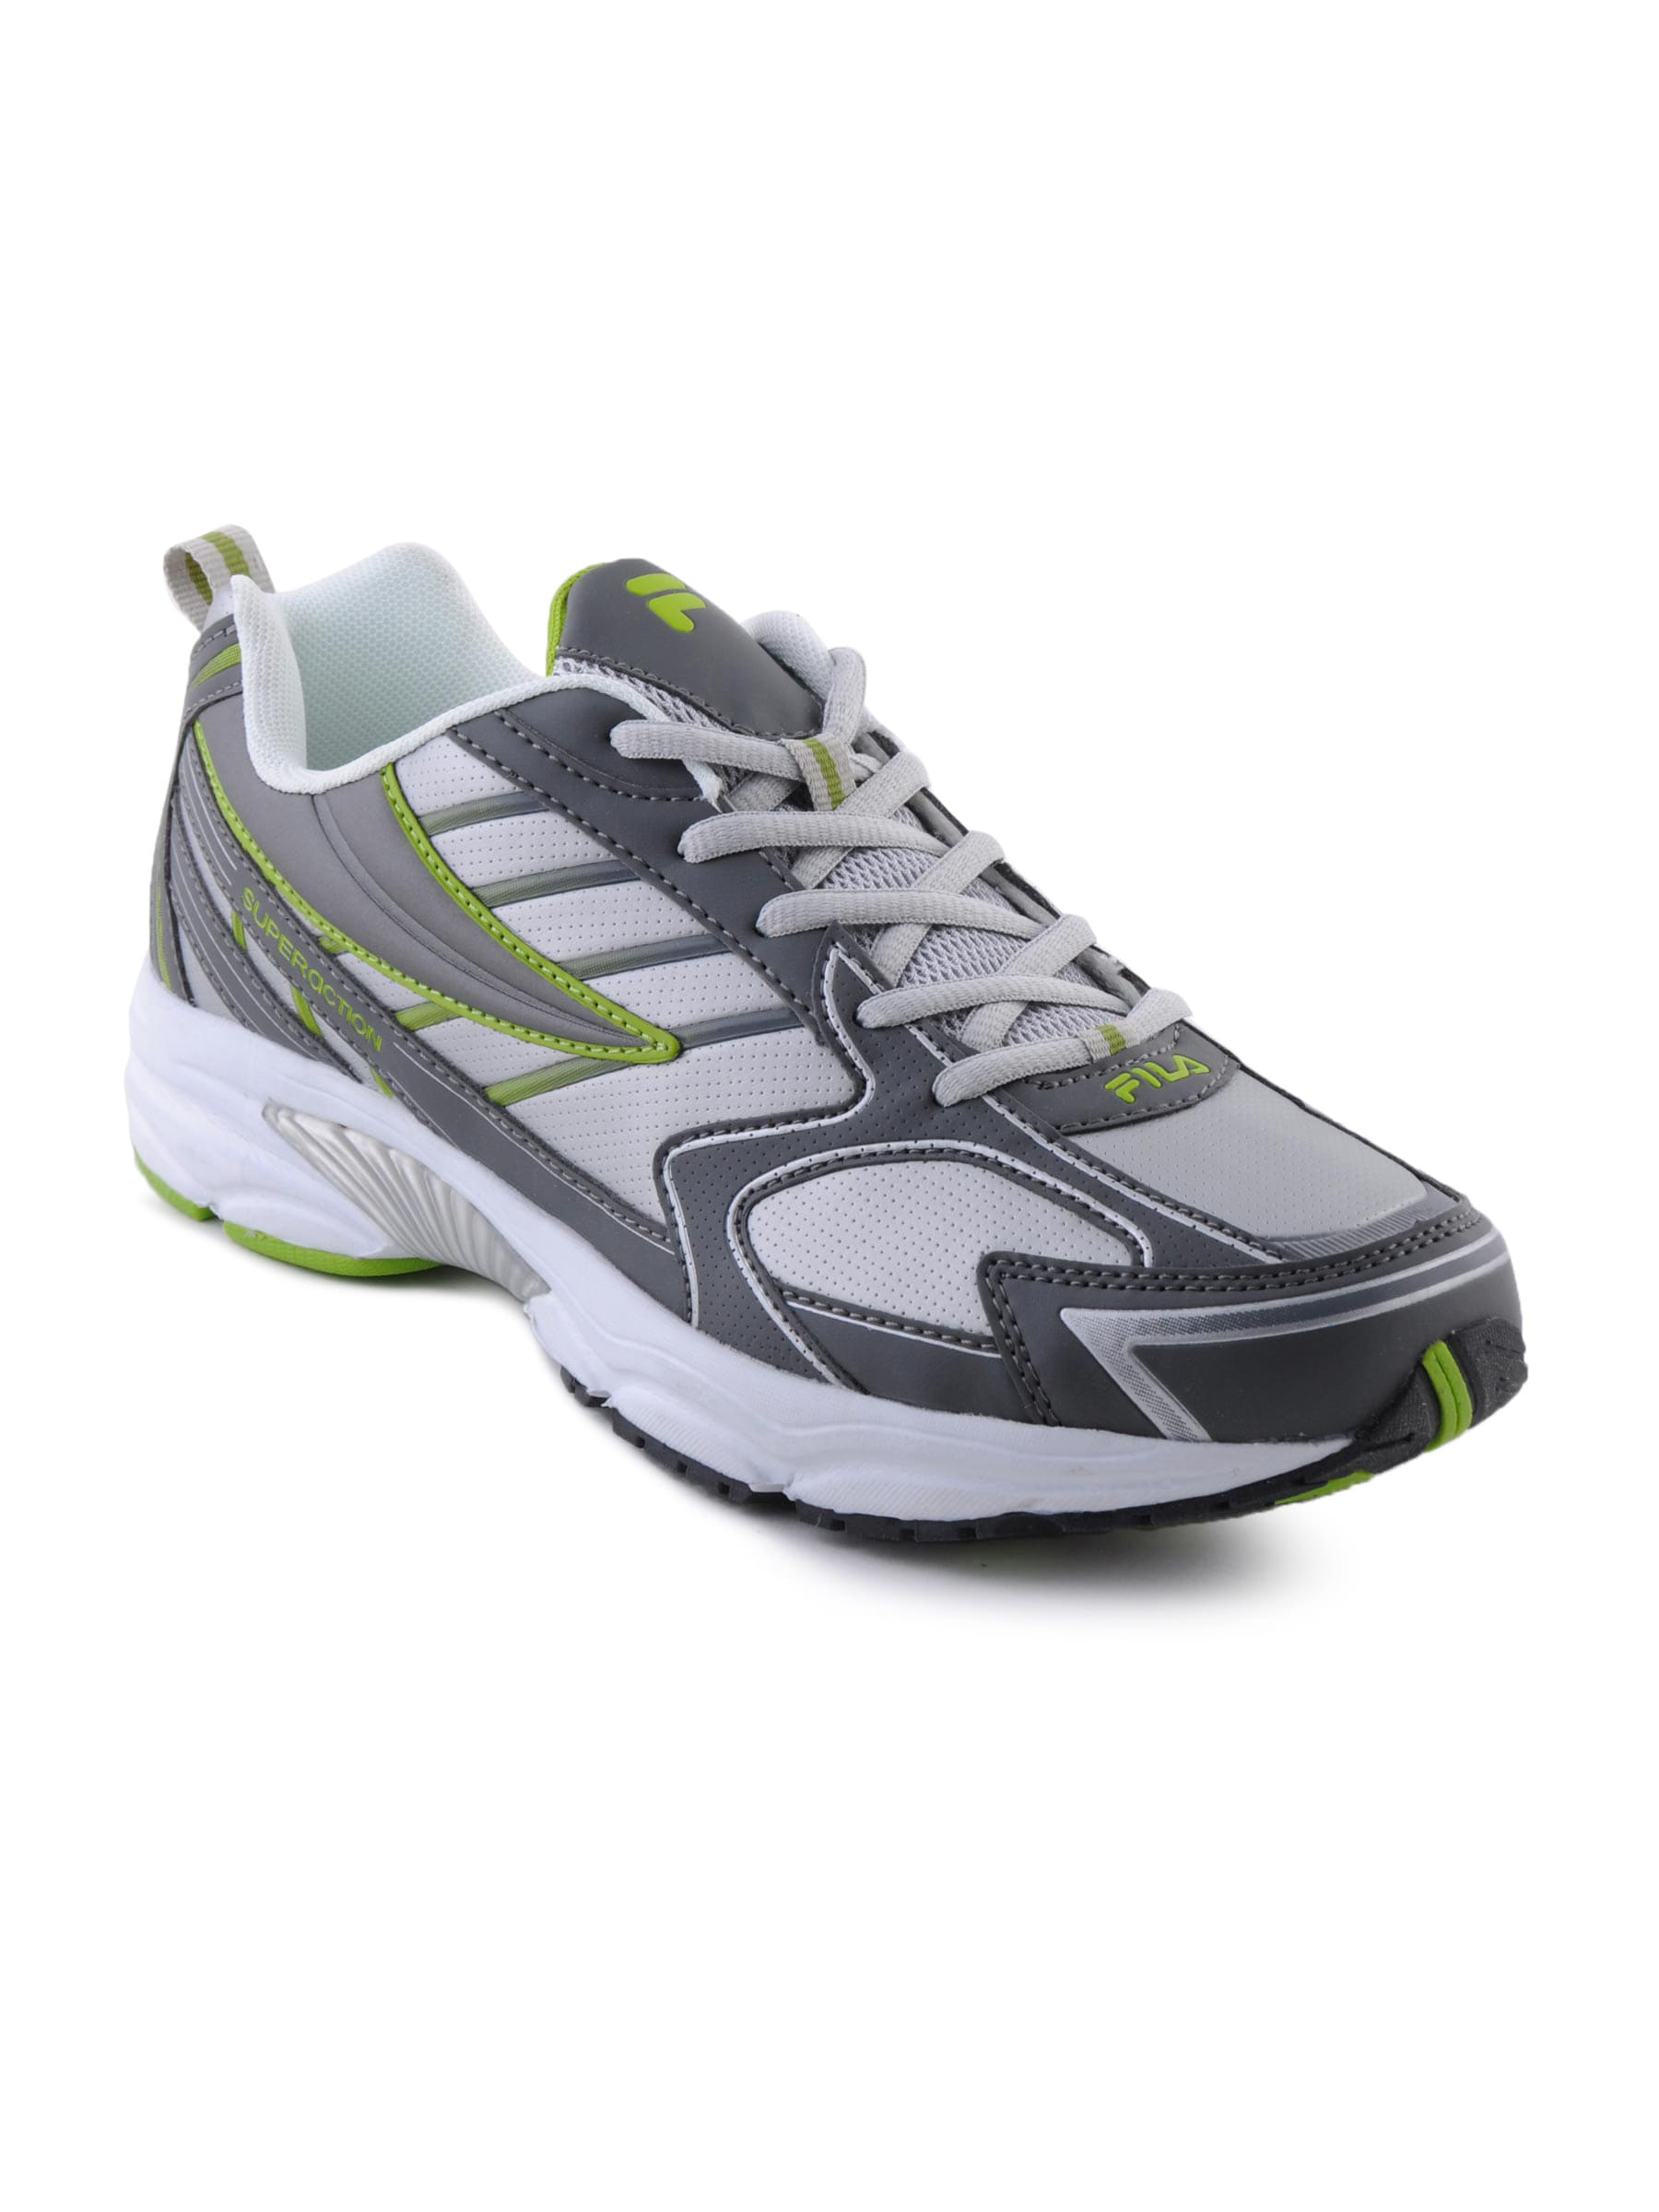

Product Title:  Fila Men Destiny Grey Sports Shoes
Euclidean Distance from input image: 27.668856


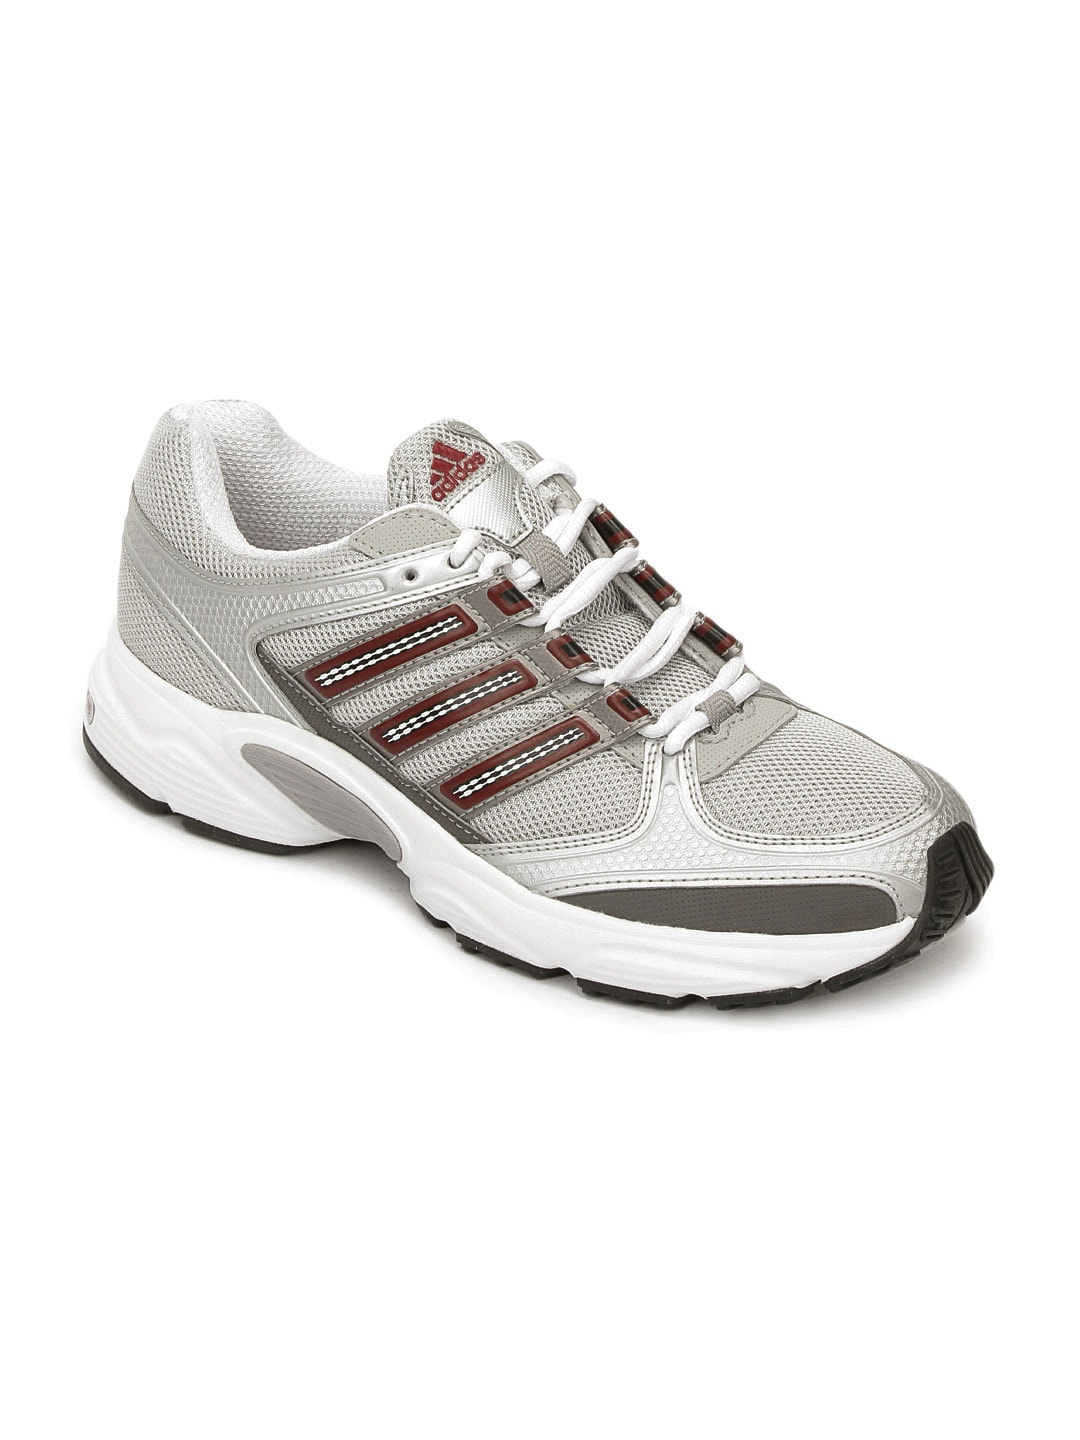

Product Title:  ADIDAS Men Silver Phaedra Shoes
Euclidean Distance from input image: 29.393417


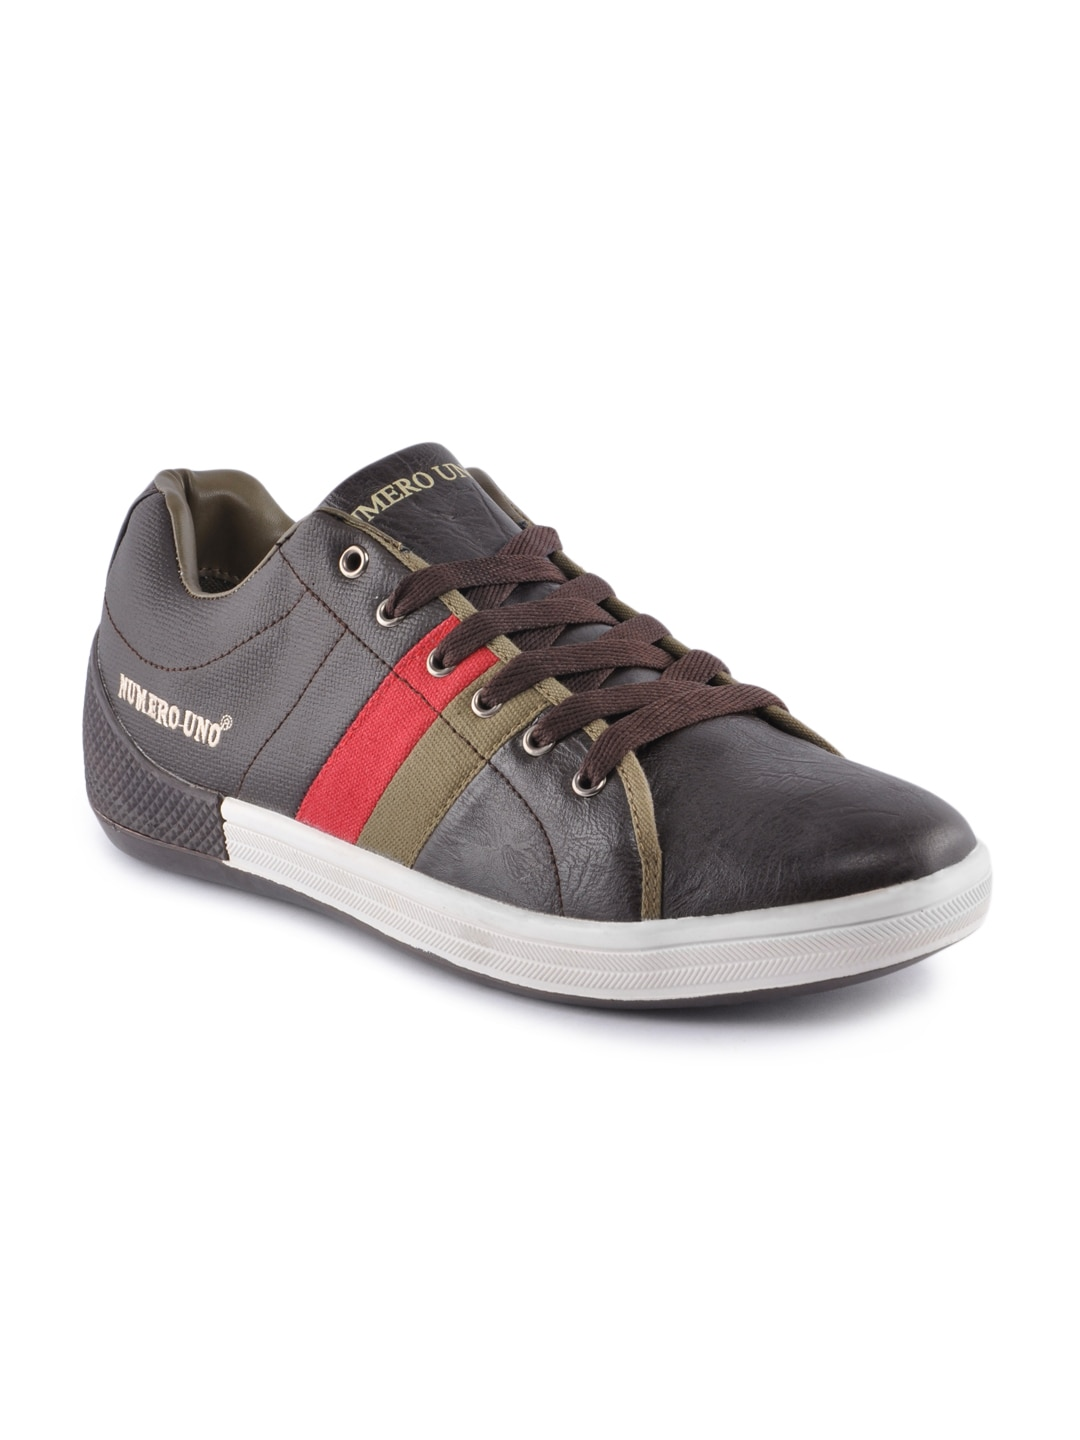

Product Title:  Numero Uno Men Brown Casual Shoes
Euclidean Distance from input image: 30.16472


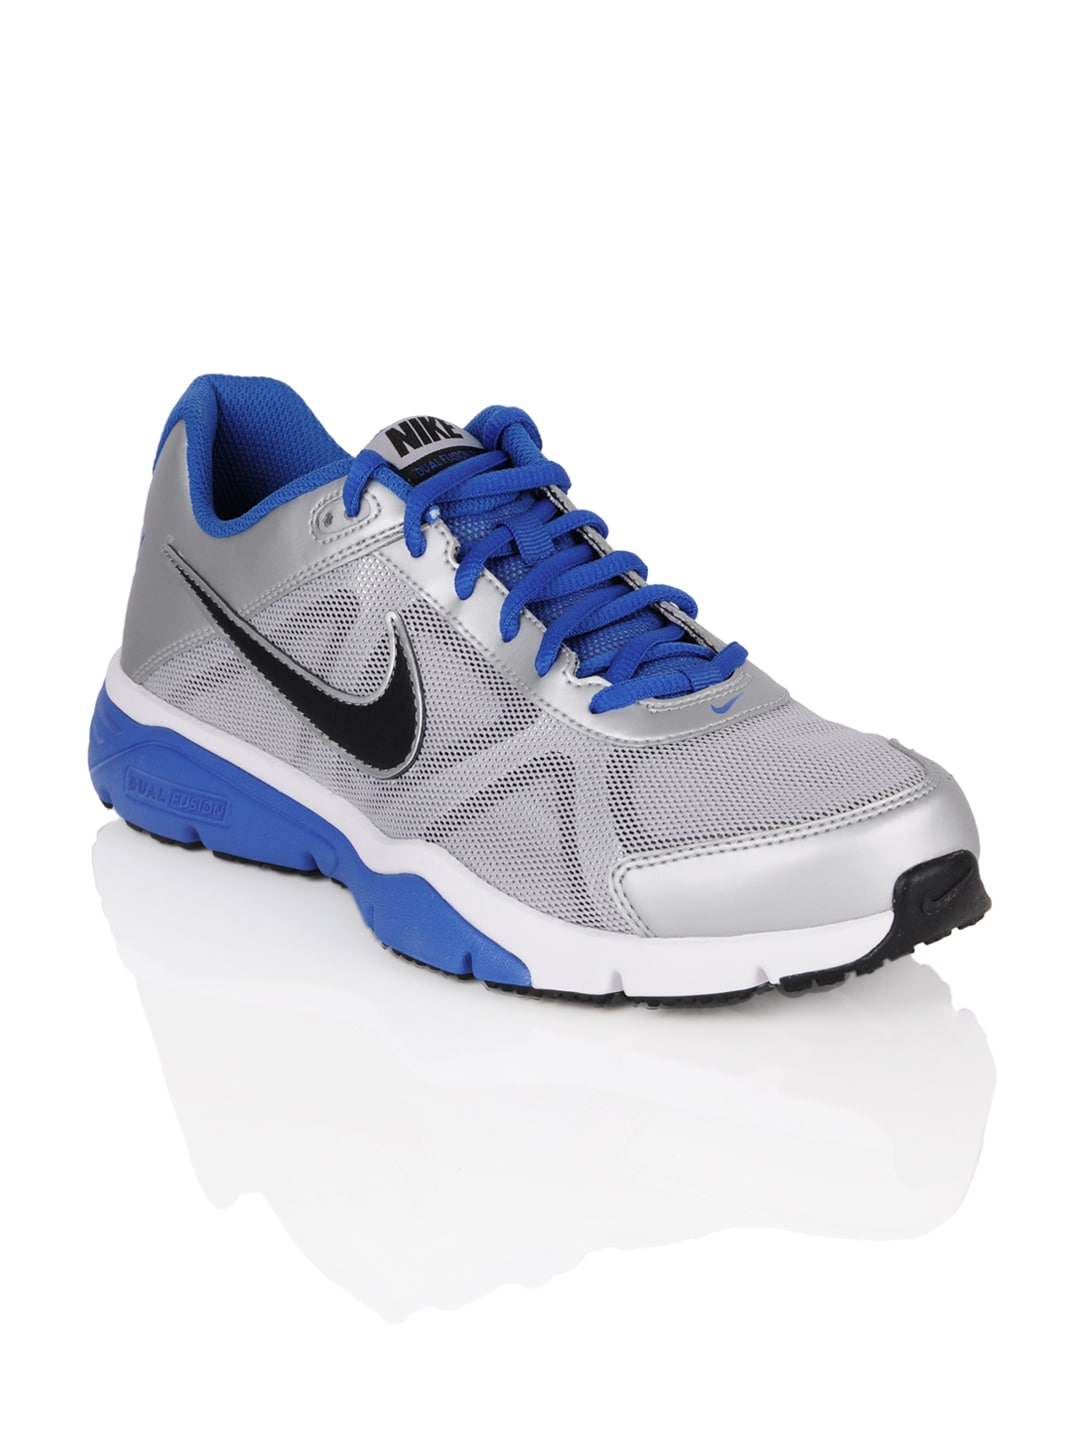

Product Title:  Nike Men Dual Fusion TR III Grey Sports Shoes
Euclidean Distance from input image: 30.953018


In [ ]:
def get_similar_products_cnn(product_id, num_results):
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product image", "="*20)
    ip_row = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[0]])]
    #print(ip_row.head())
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['ProductTitle'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = men[['ImageURL','ProductTitle']].loc[men['ProductId']==int(Productids[indices[i]])]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])

get_similar_products_cnn('13683', 5)

**NOTE** - The above feature extraction process can be repeated for other genders (Women, Boys and Girls) as well. So let's extract for each one by one.

**For Gender - Women**

In [ ]:
img_width, img_height = 224, 224


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/kaggle/input/fashion-images/data/Footwear/Women/Images/"

nb_train_samples = 769
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((769, 100352))
    
    np.save(open('./Women_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Women_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

Found 769 images belonging to 1 classes.


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Time taken in feature extraction 0:01:37.238284


**For Gender - Boys**

In [ ]:
img_width, img_height = 224, 224


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/kaggle/input/fashion-images/data/Apparel/Boys/Images"

nb_train_samples = 759
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((759, 100352))
    
    np.save(open('./Boys_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Boys_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

Found 759 images belonging to 1 classes.
Time taken in feature extraction 0:01:37.691526


**For Gender - Girls**

In [ ]:
img_width, img_height = 224, 224


#top_model_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
train_data_dir = "/kaggle/input/fashion-images/data/Apparel/Girls/Images"

nb_train_samples = 567
epochs = 50
batch_size = 1

def extract_features():
    Itemcodes = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = applications.ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    for i in generator.filenames:
        Itemcodes.append(i[(i.find("/")+1):i.find(".")])
    extracted_features = model.predict_generator(generator, nb_train_samples // batch_size)
    extracted_features = extracted_features.reshape((567, 100352))
    
    np.save(open('./Girls_ResNet_features.npy', 'wb'), extracted_features)
    np.save(open('./Girls_ResNet_feature_product_ids.npy', 'wb'), np.array(Itemcodes))
    
a = datetime.now()
extract_features()
print("Time taken in feature extraction", datetime.now()-a)

Found 567 images belonging to 1 classes.
Time taken in feature extraction 0:01:13.451594


### 5. Deploying the solution

In [ ]:
boys_extracted_features = np.load('/kaggle/working/Boys_ResNet_features.npy')
boys_Productids = np.load('/kaggle/working/Boys_ResNet_feature_product_ids.npy')
girls_extracted_features = np.load('/kaggle/working/Girls_ResNet_features.npy')
girls_Productids = np.load('/kaggle/working/Girls_ResNet_feature_product_ids.npy')
men_extracted_features = np.load('/kaggle/working/Men_ResNet_features.npy')
men_Productids = np.load('/kaggle/working/Men_ResNet_feature_product_ids.npy')
women_extracted_features = np.load('/kaggle/working/Women_ResNet_features.npy')
women_Productids = np.load('/kaggle/working/Women_ResNet_feature_product_ids.npy')
fashion_df["ProductId"] = fashion_df["ProductId"].astype(str)

In [ ]:
def get_similar_products_cnn(product_id, num_results):
    if(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Boys"):
        extracted_features = boys_extracted_features
        Productids = boys_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Girls"):
        extracted_features = girls_extracted_features
        Productids = girls_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Men"):
        extracted_features = men_extracted_features
        Productids = men_Productids
    elif(fashion_df[fashion_df['ProductId']==product_id]['Gender'].values[0]=="Women"):
        extracted_features = women_extracted_features
        Productids = women_Productids
    Productids = list(Productids)
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    print("="*20, "input product details", "="*20)
    ip_row = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[0]]]
    for indx, row in ip_row.iterrows():
        display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
        print('Product Title: ', row['ProductTitle'])
    print("\n","="*20, "Recommended products", "="*20)
    for i in range(1,len(indices)):
        rows = fashion_df[['ImageURL','ProductTitle']].loc[fashion_df['ProductId']==Productids[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['ImageURL'], width = 224, height = 224,embed=True))
            print('Product Title: ', row['ProductTitle'])
            print('Euclidean Distance from input image:', pdists[i])

==================== input product details ====================


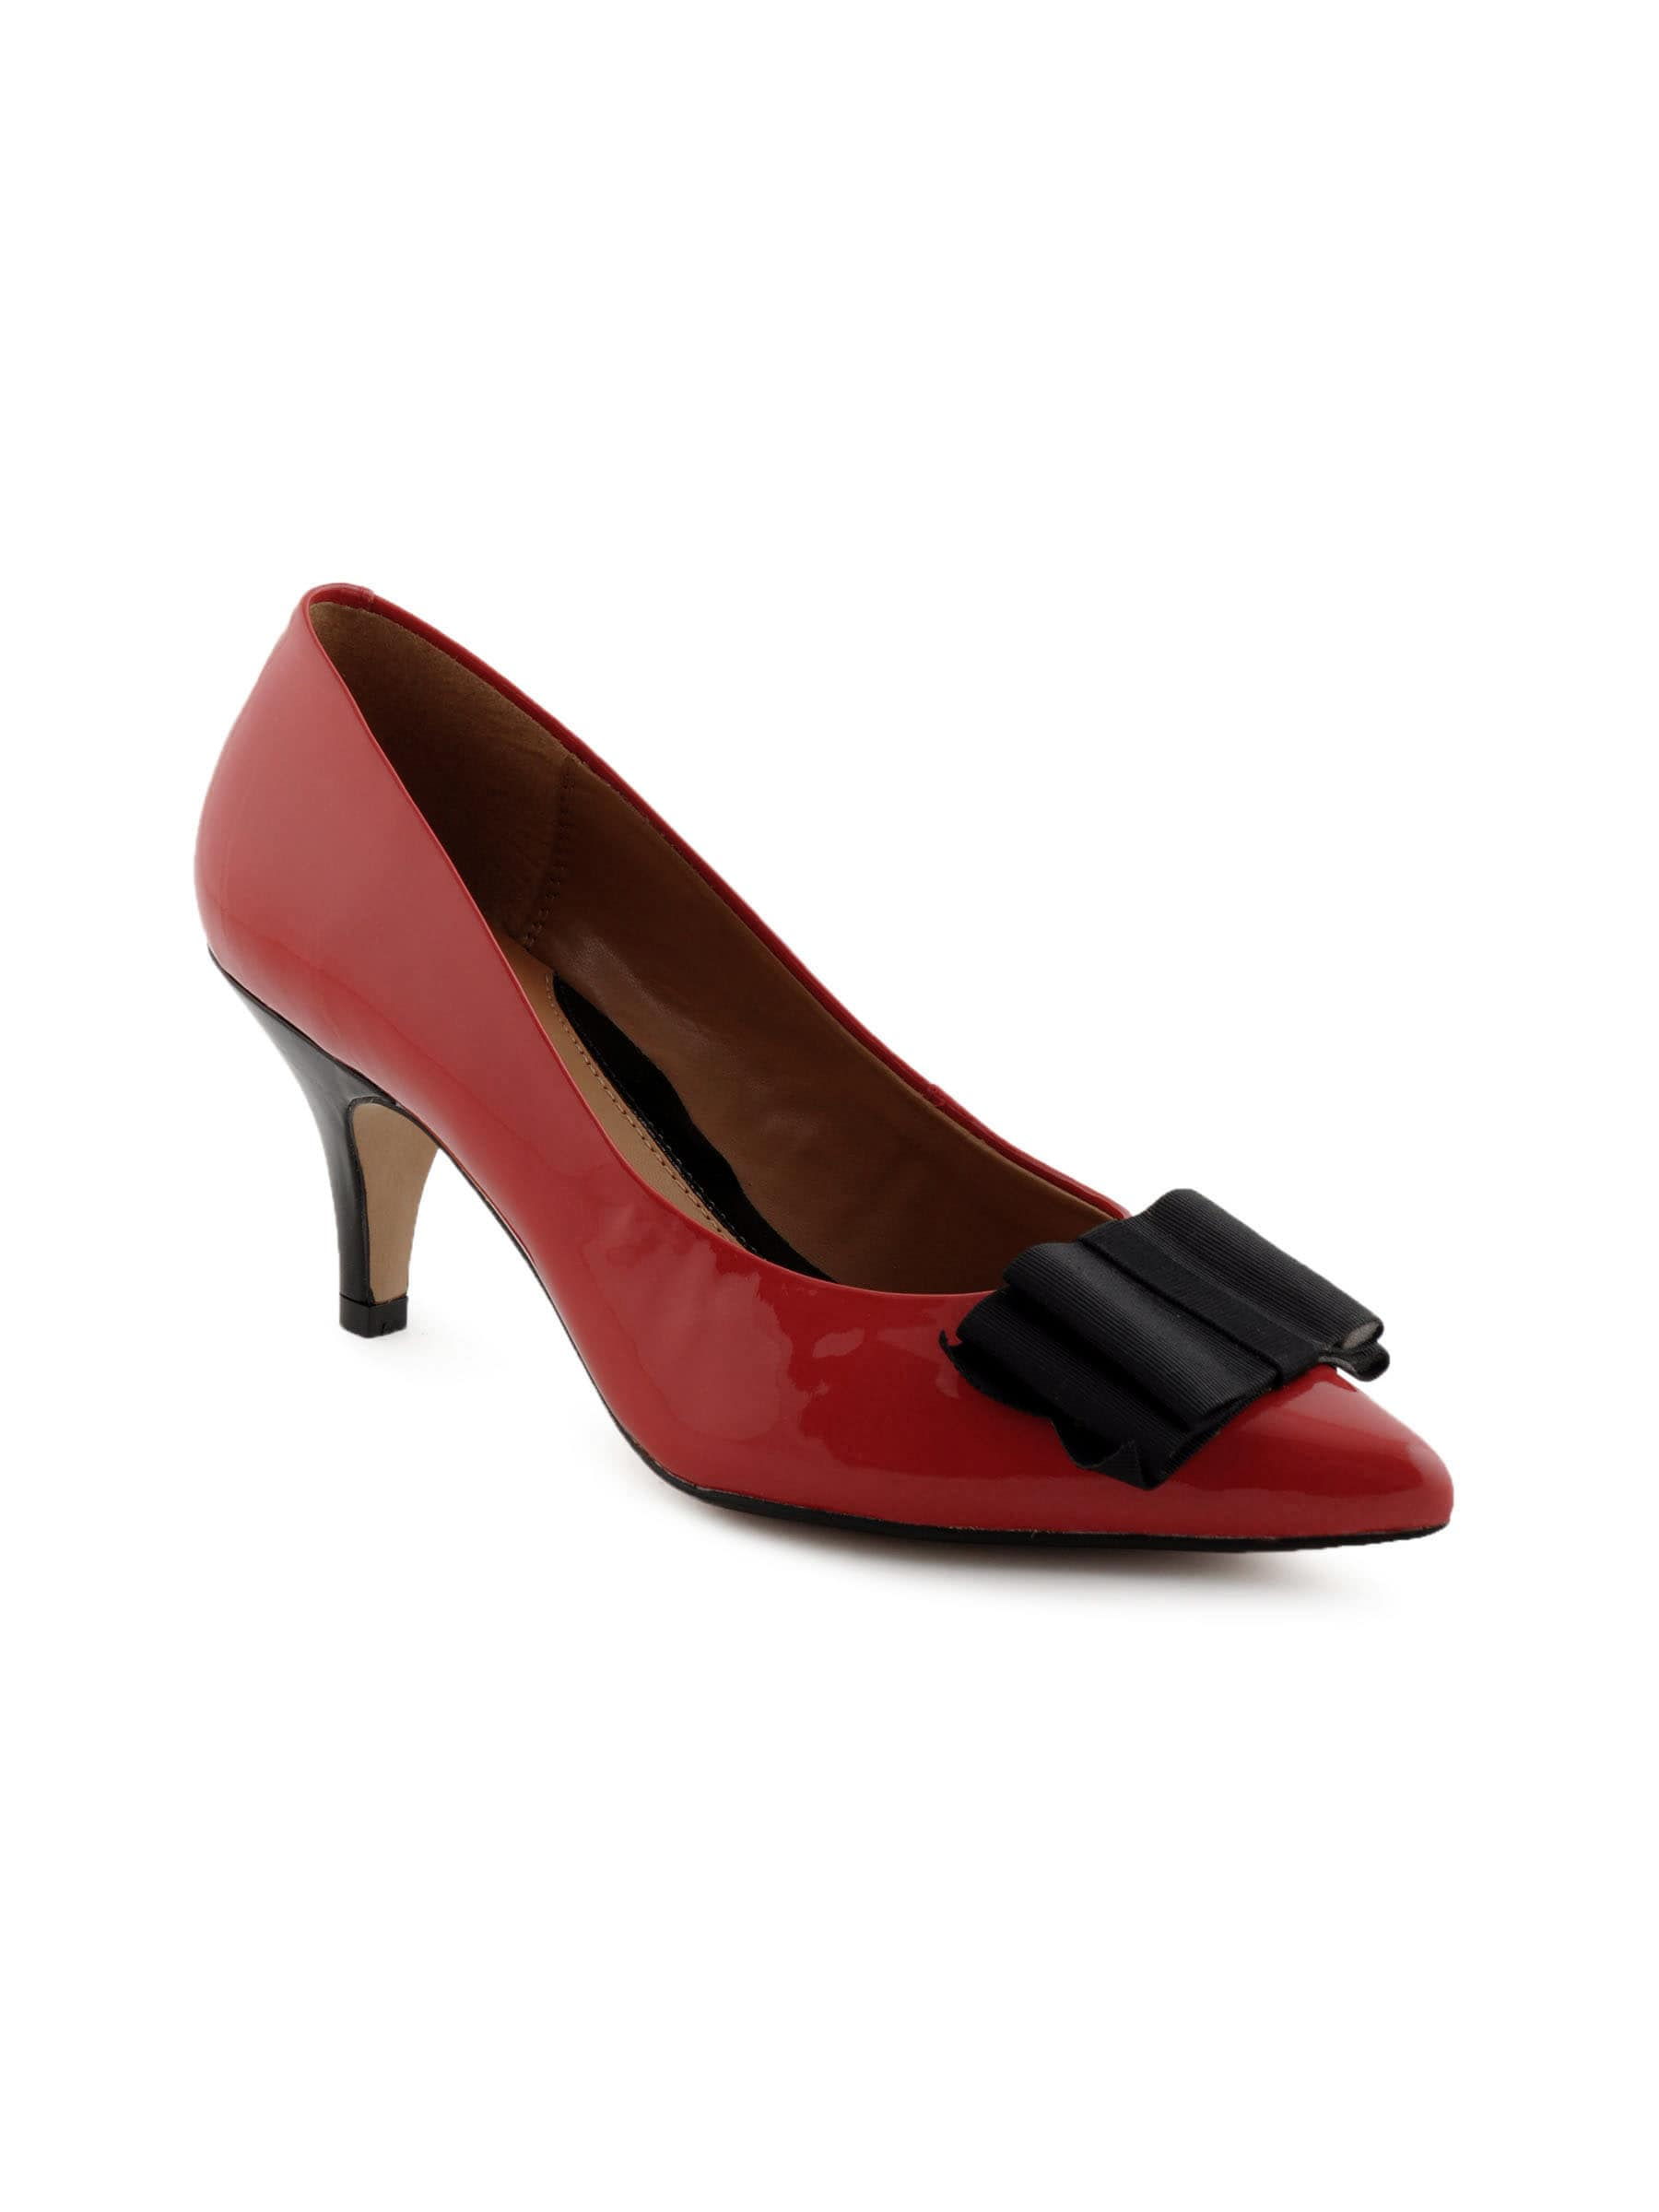

Product Title:  Clarks Women Balti Zing Red Heels

 ==================== Recommended products ====================


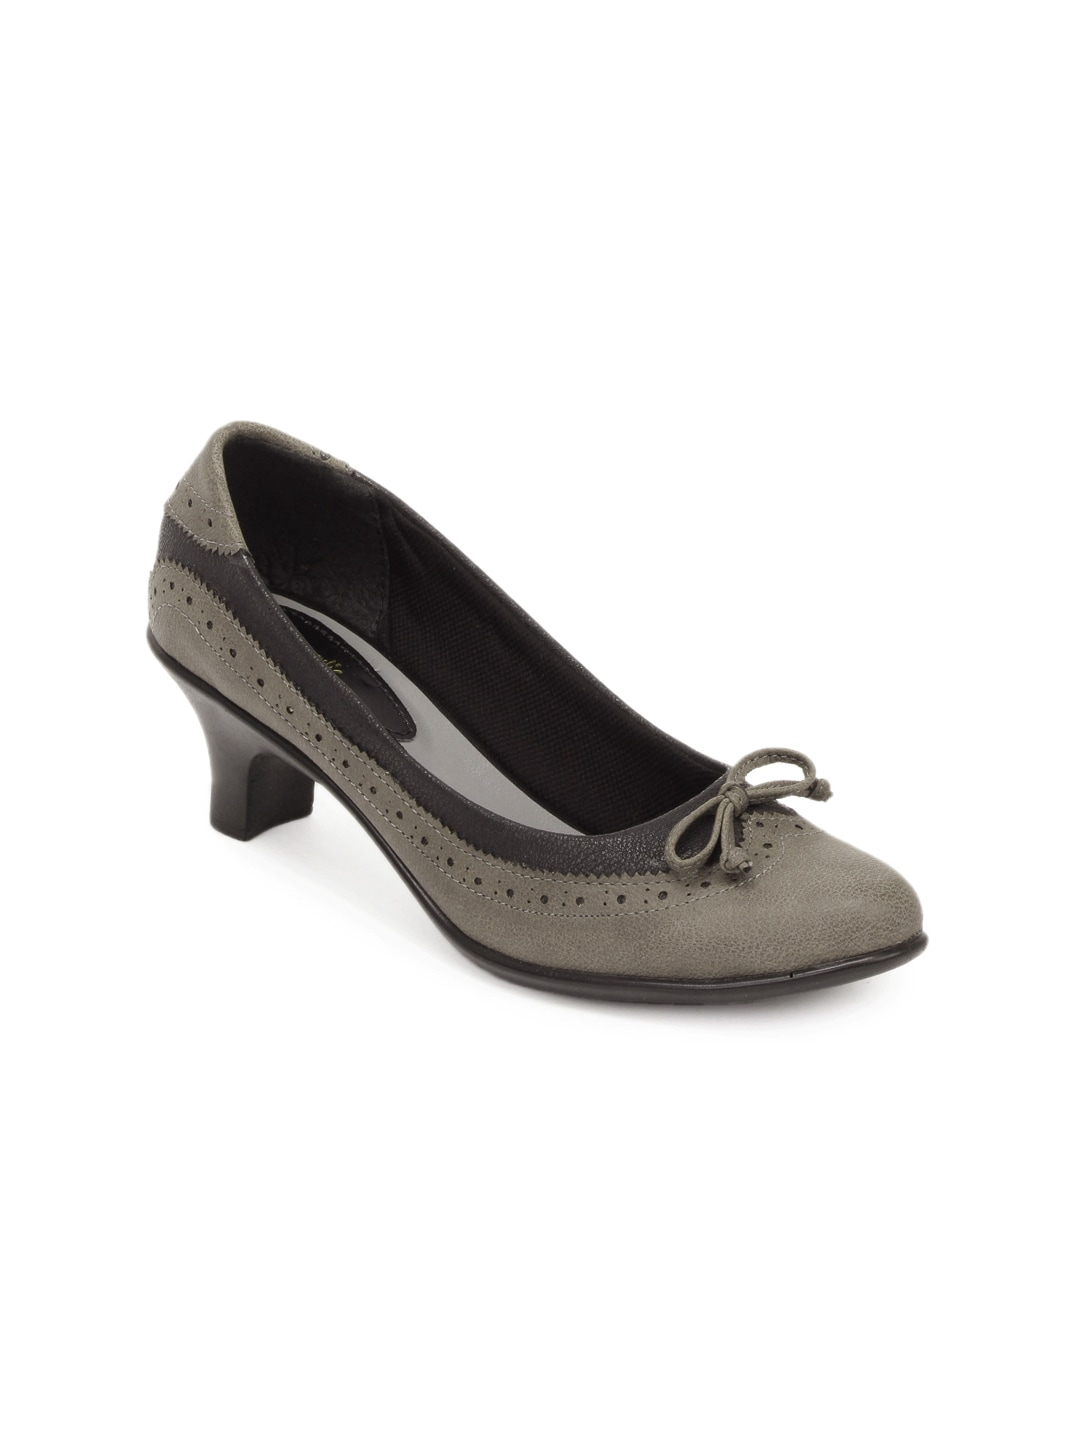

Product Title:  Catwalk Women Black & Grey Heels
Euclidean Distance from input image: 41.730297


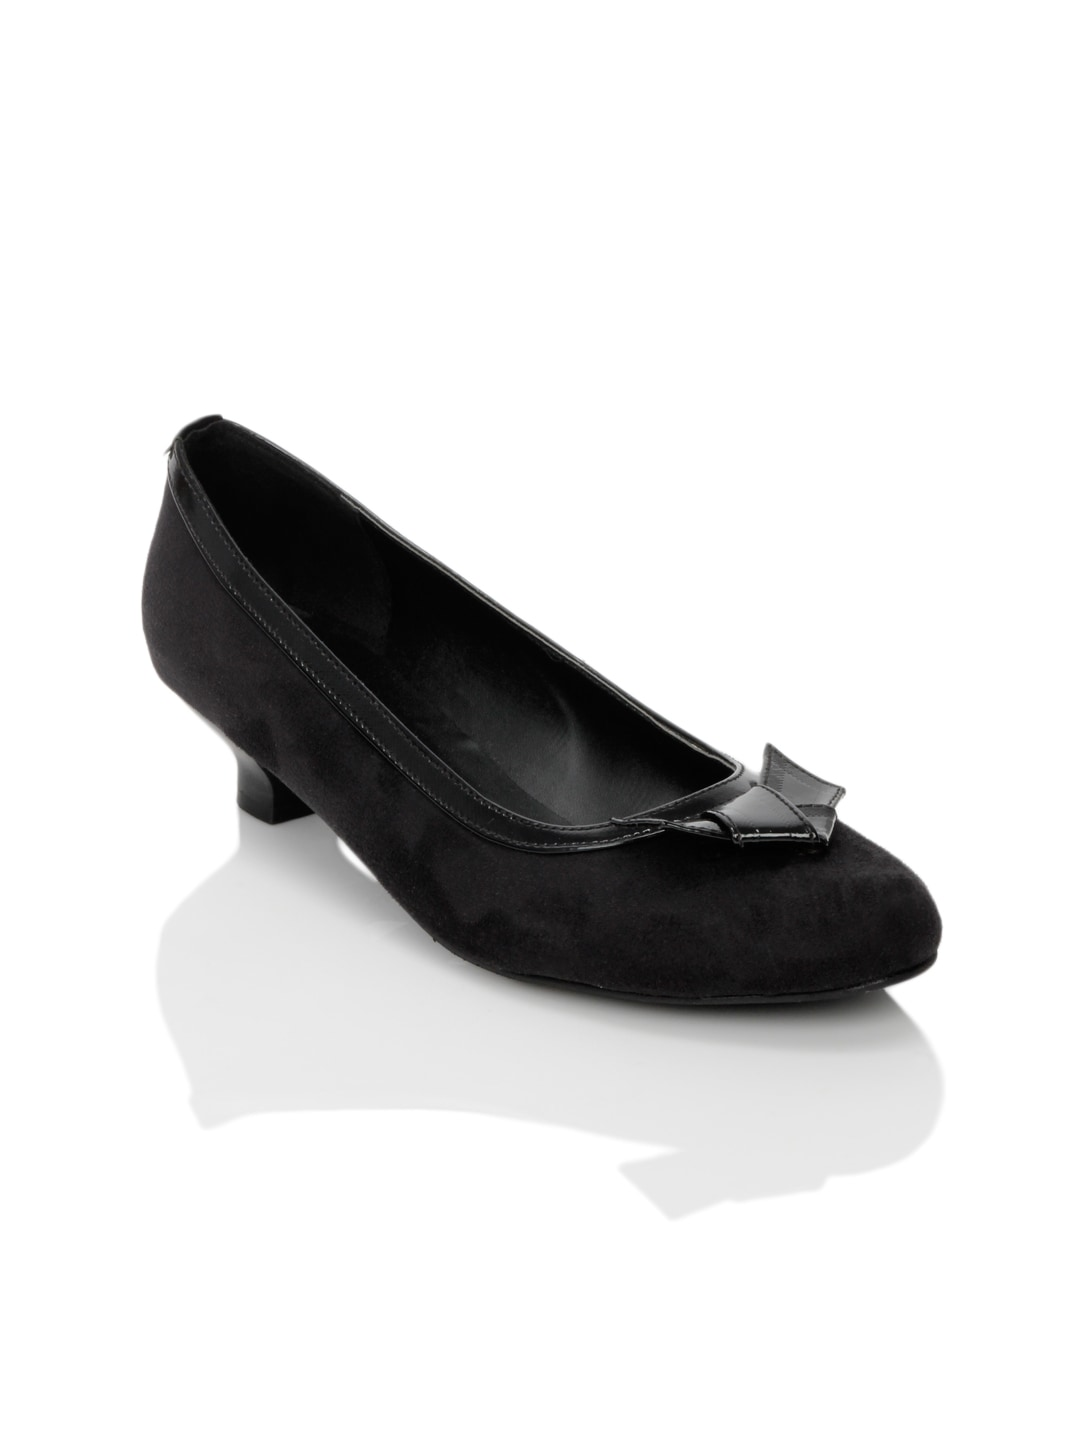

Product Title:  Rocia Women Black Shoes
Euclidean Distance from input image: 44.681526


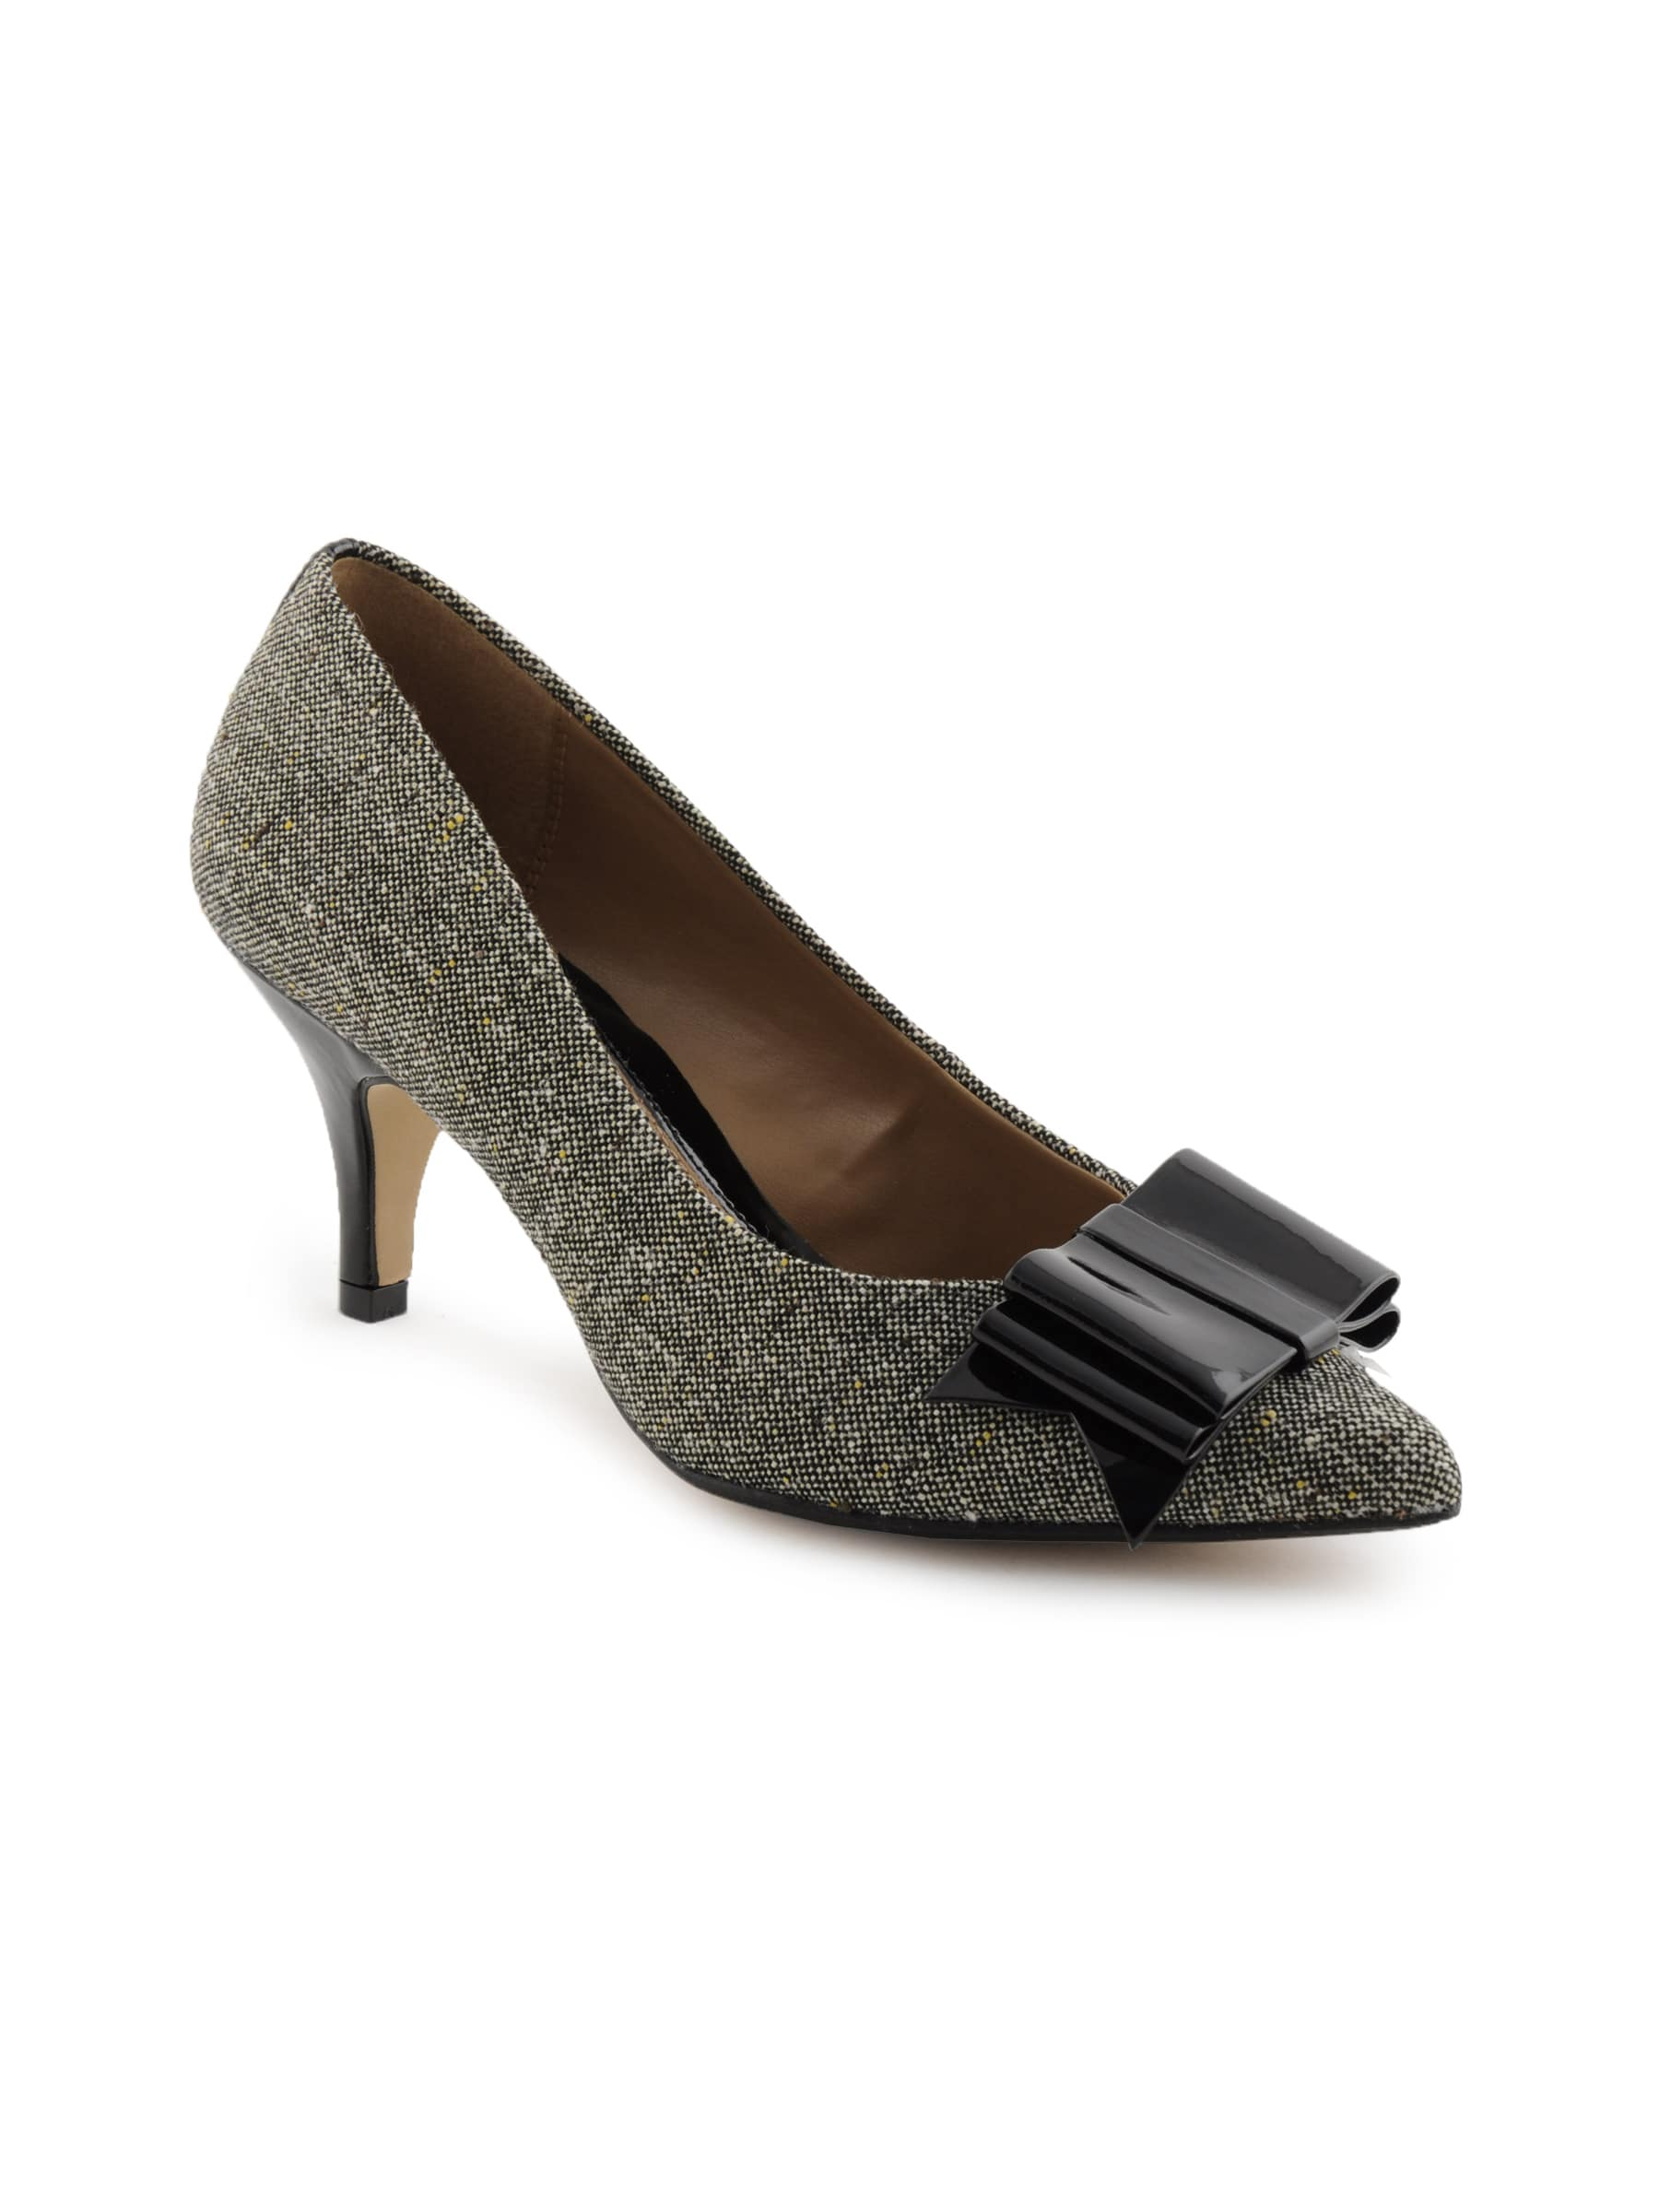

Product Title:  Clarks Women Balti Zing Black Heels
Euclidean Distance from input image: 45.083565


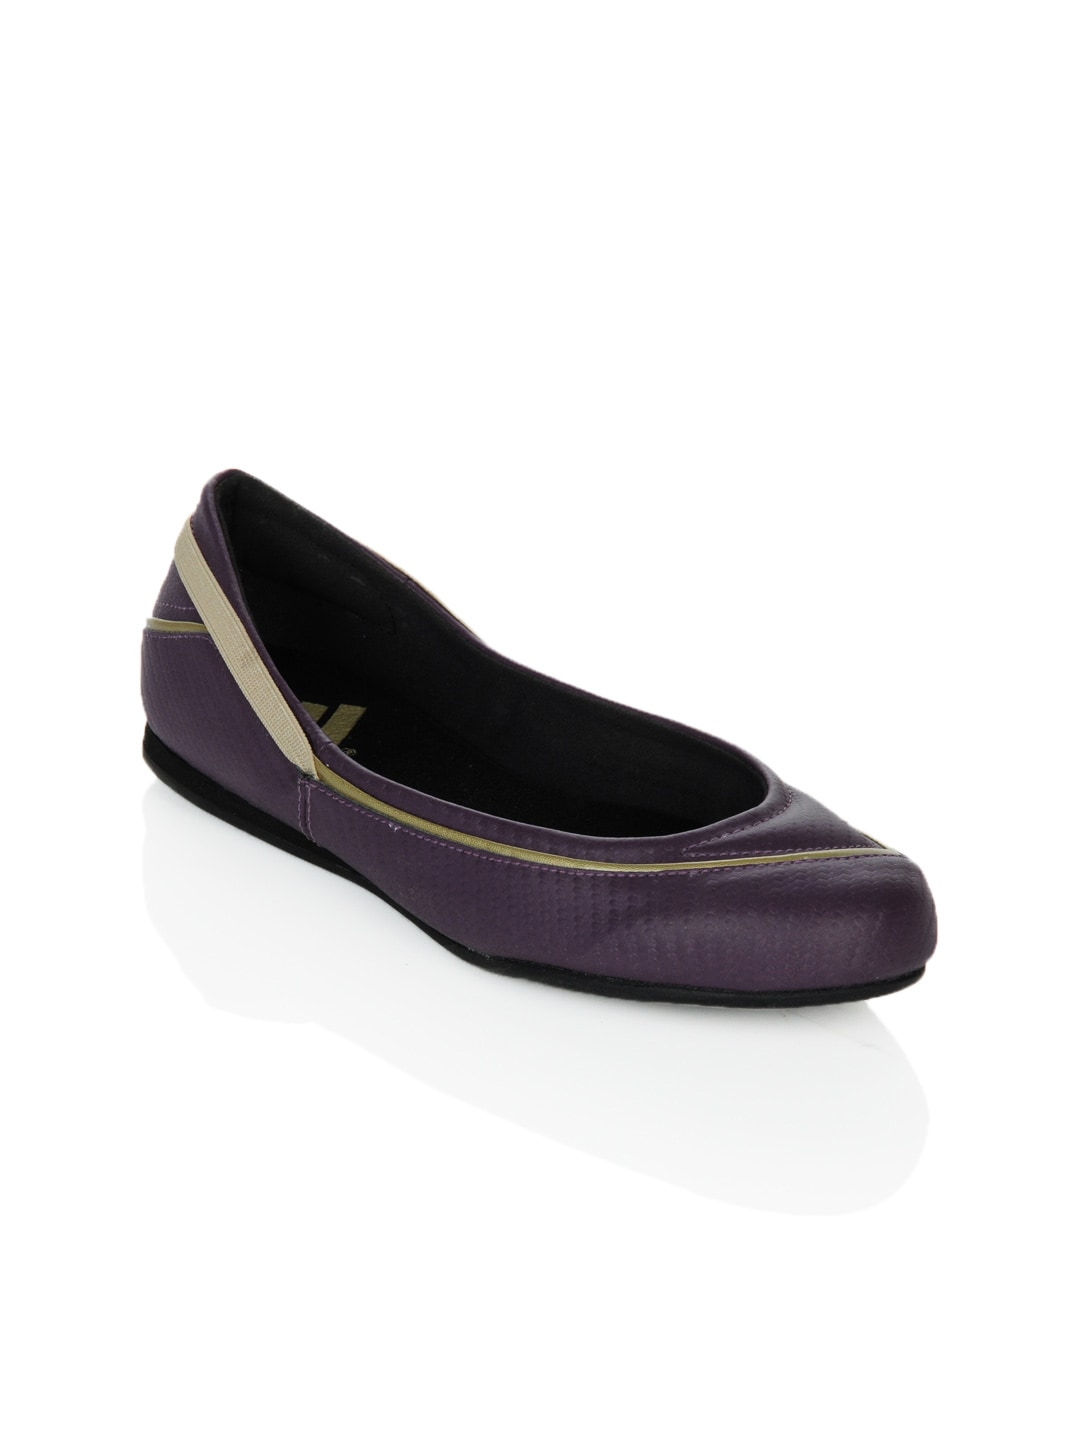

Product Title:  ADIDAS Women Ballerina Purple Shoes
Euclidean Distance from input image: 46.138386


In [ ]:
get_similar_products_cnn('21030', 5)

==================== input product details ====================


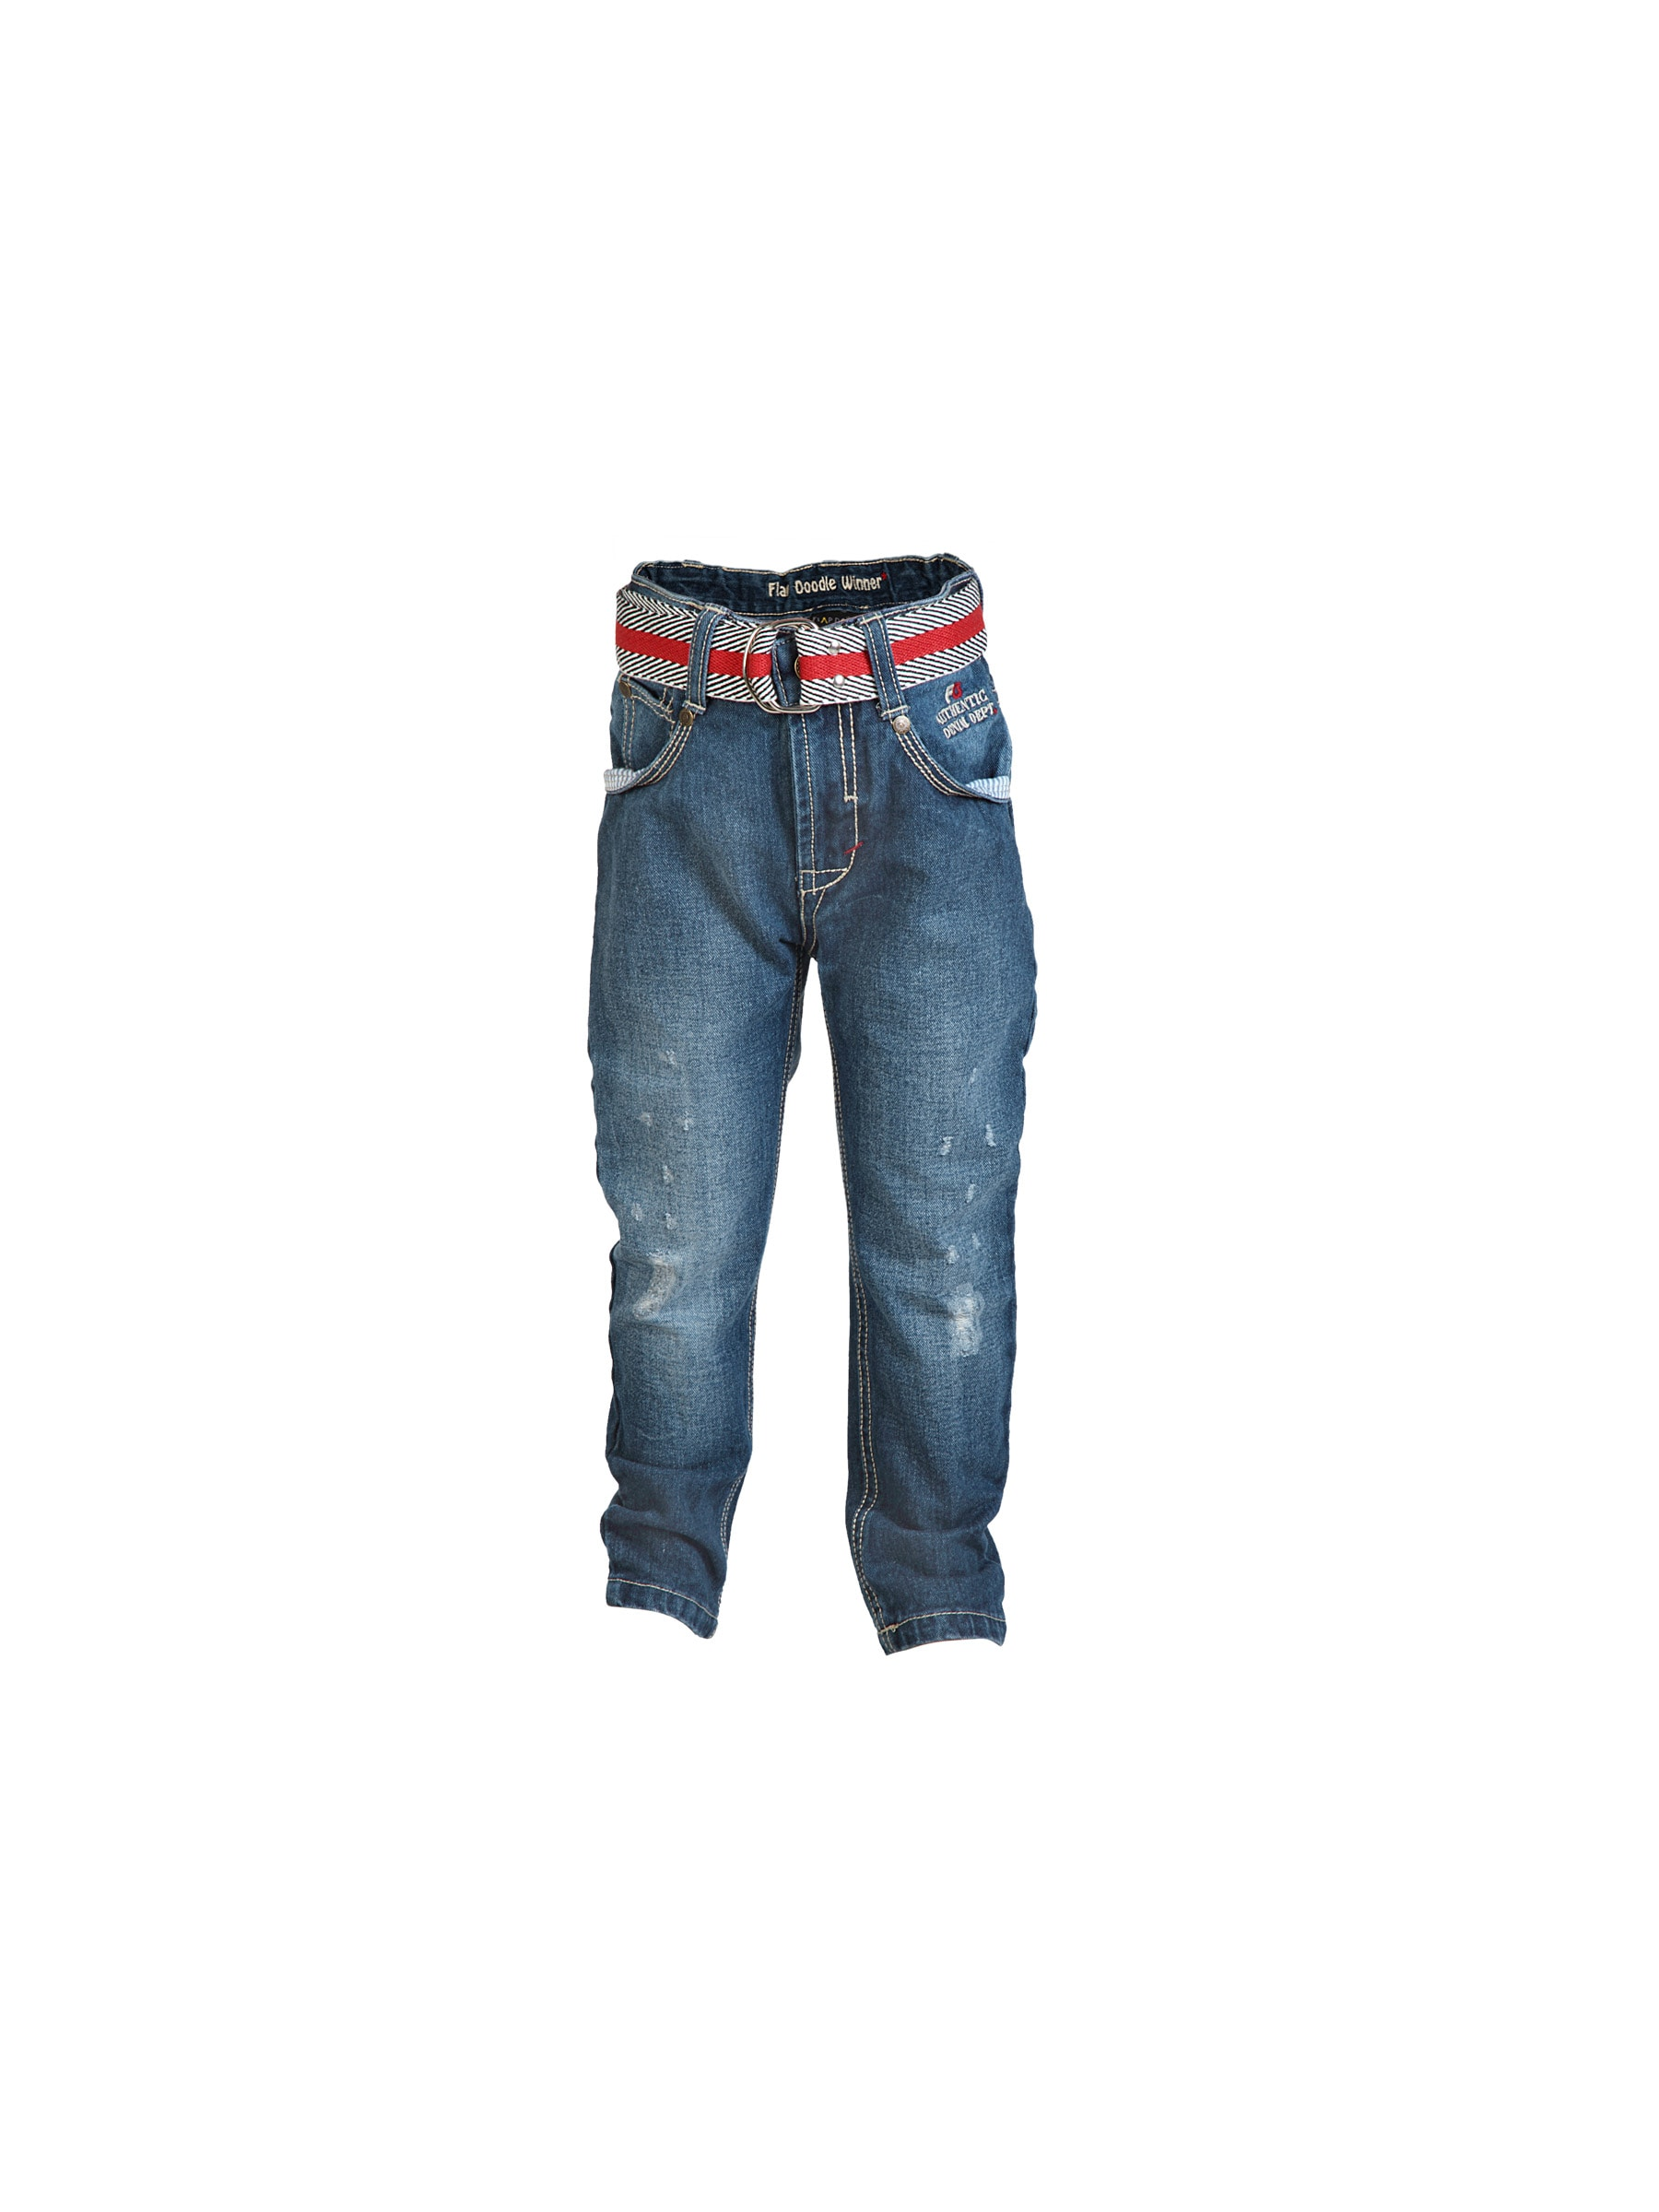

Product Title:  Doodle Boys-Boys Washed Blue Jeans

 ==================== Recommended products ====================


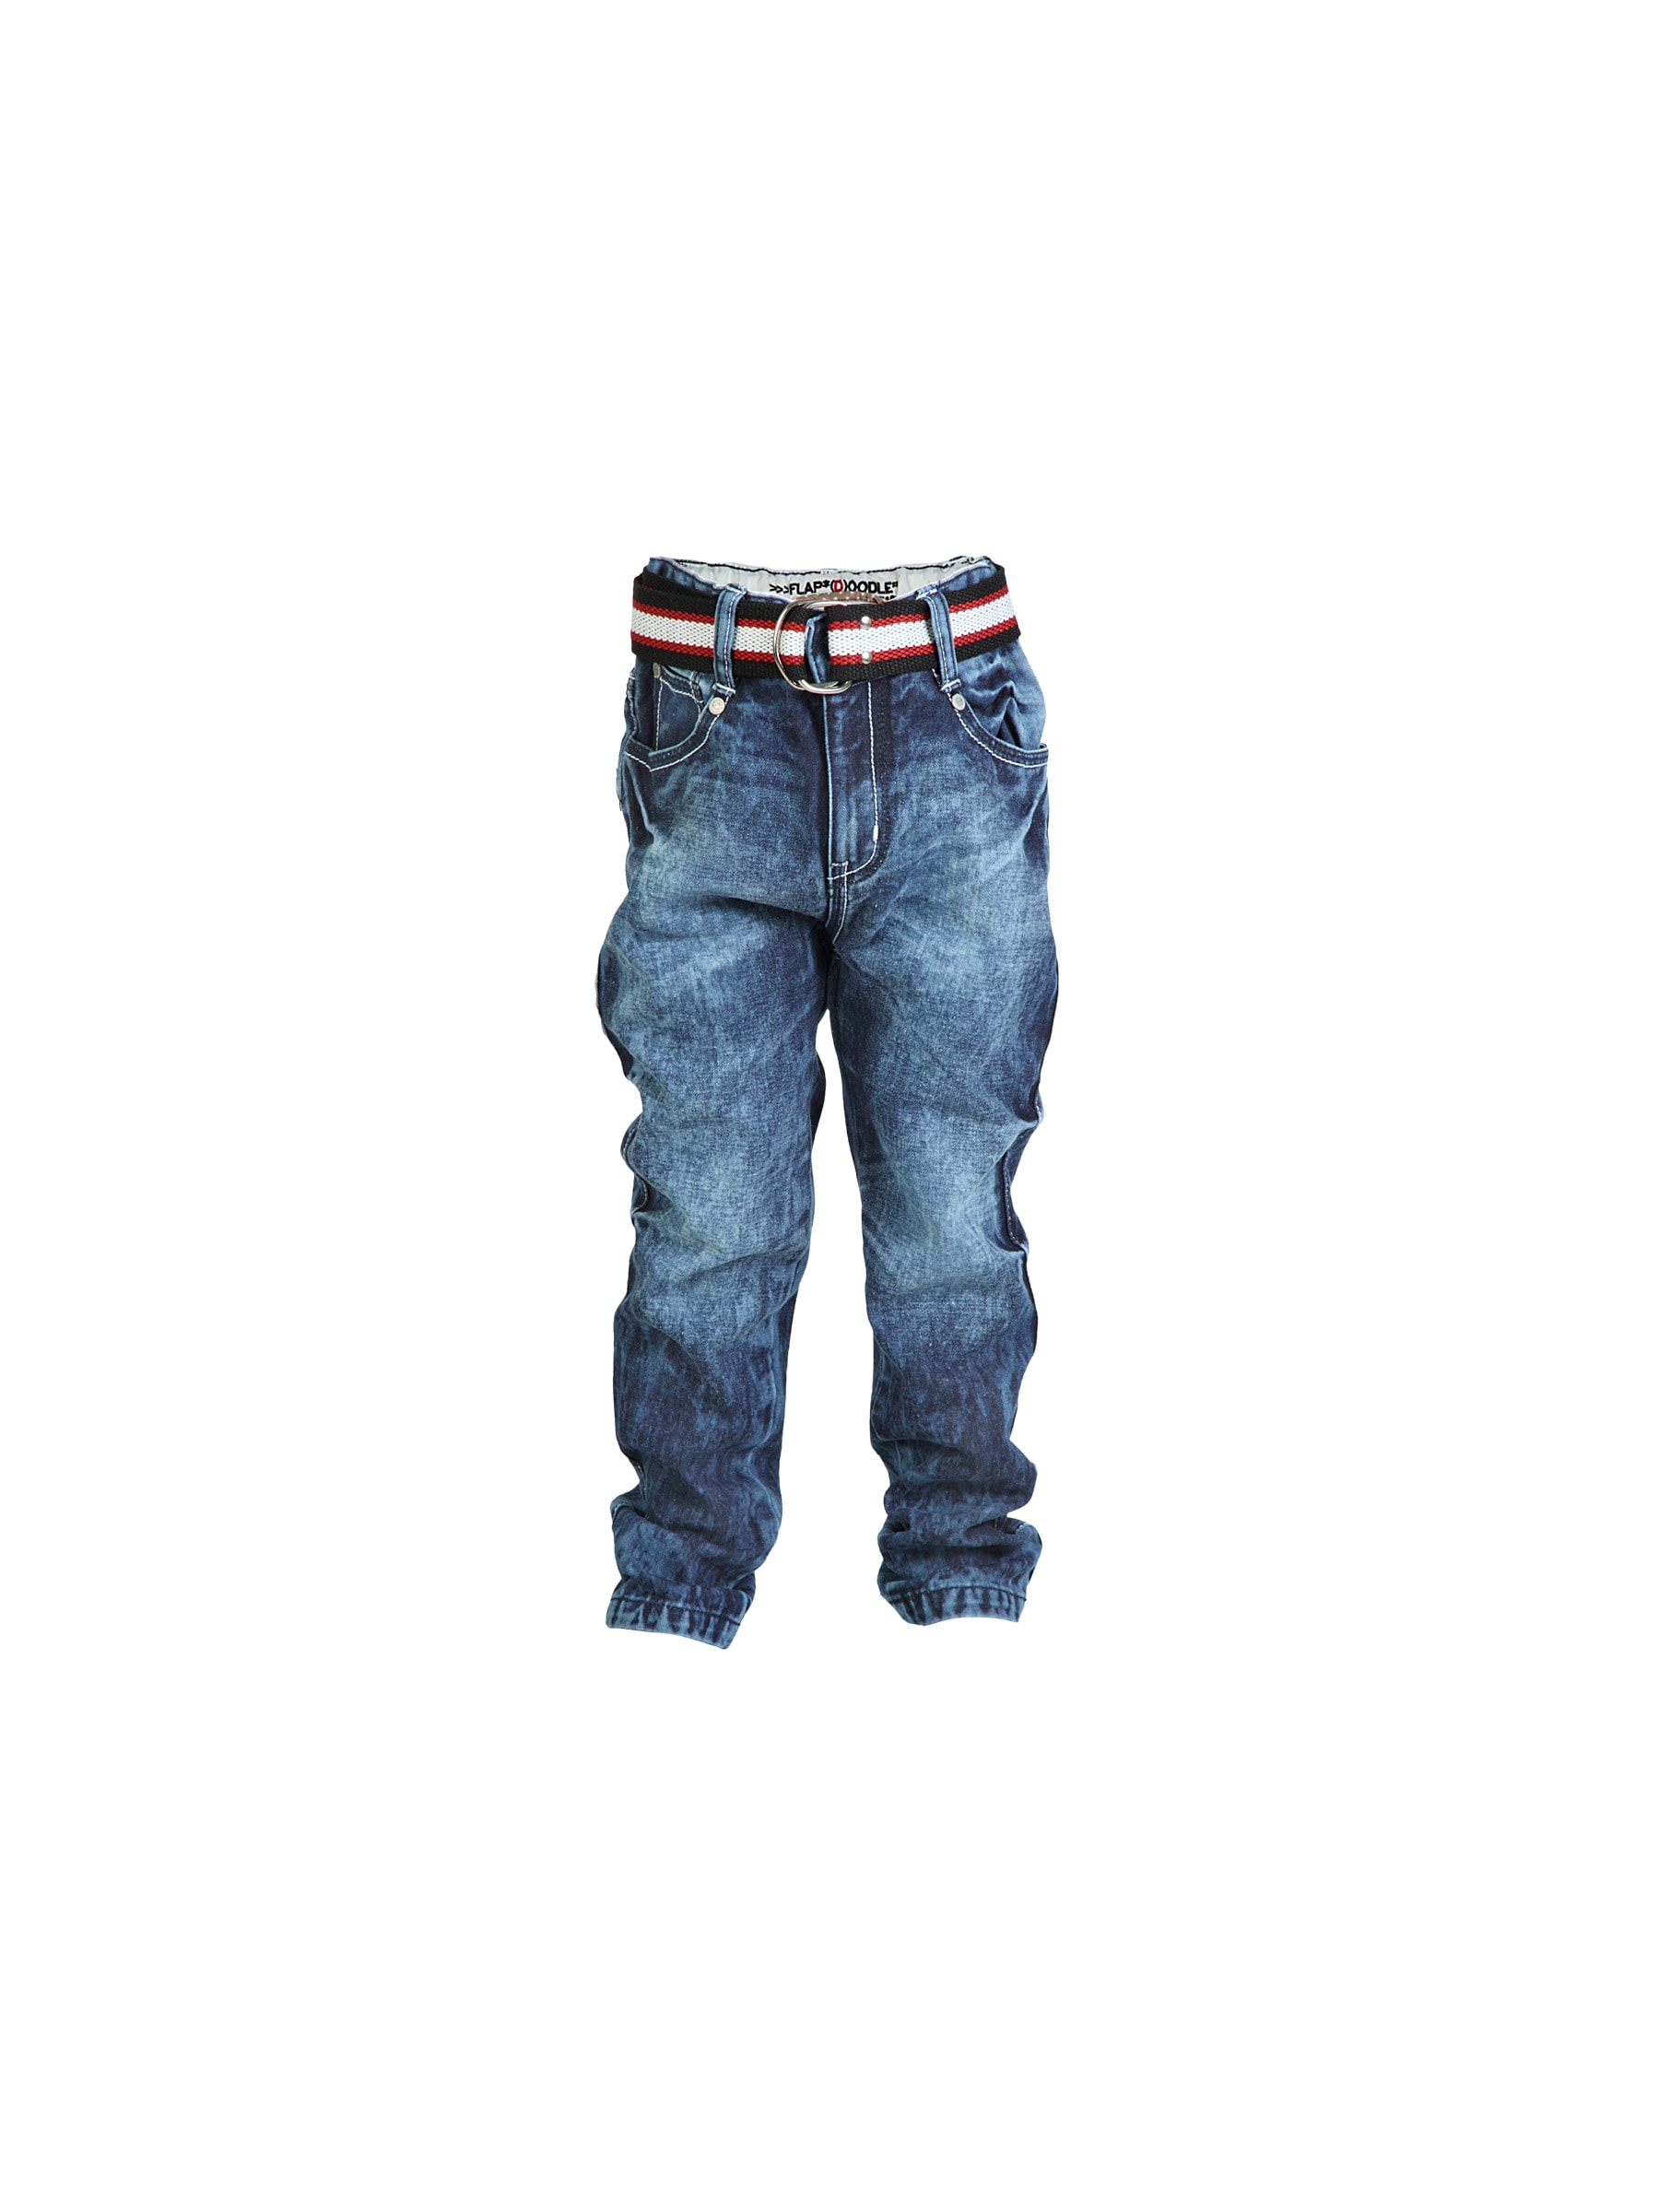

Product Title:  Doodle Boys-Boys Acid Wash Blue Jeans
Euclidean Distance from input image: 19.700968


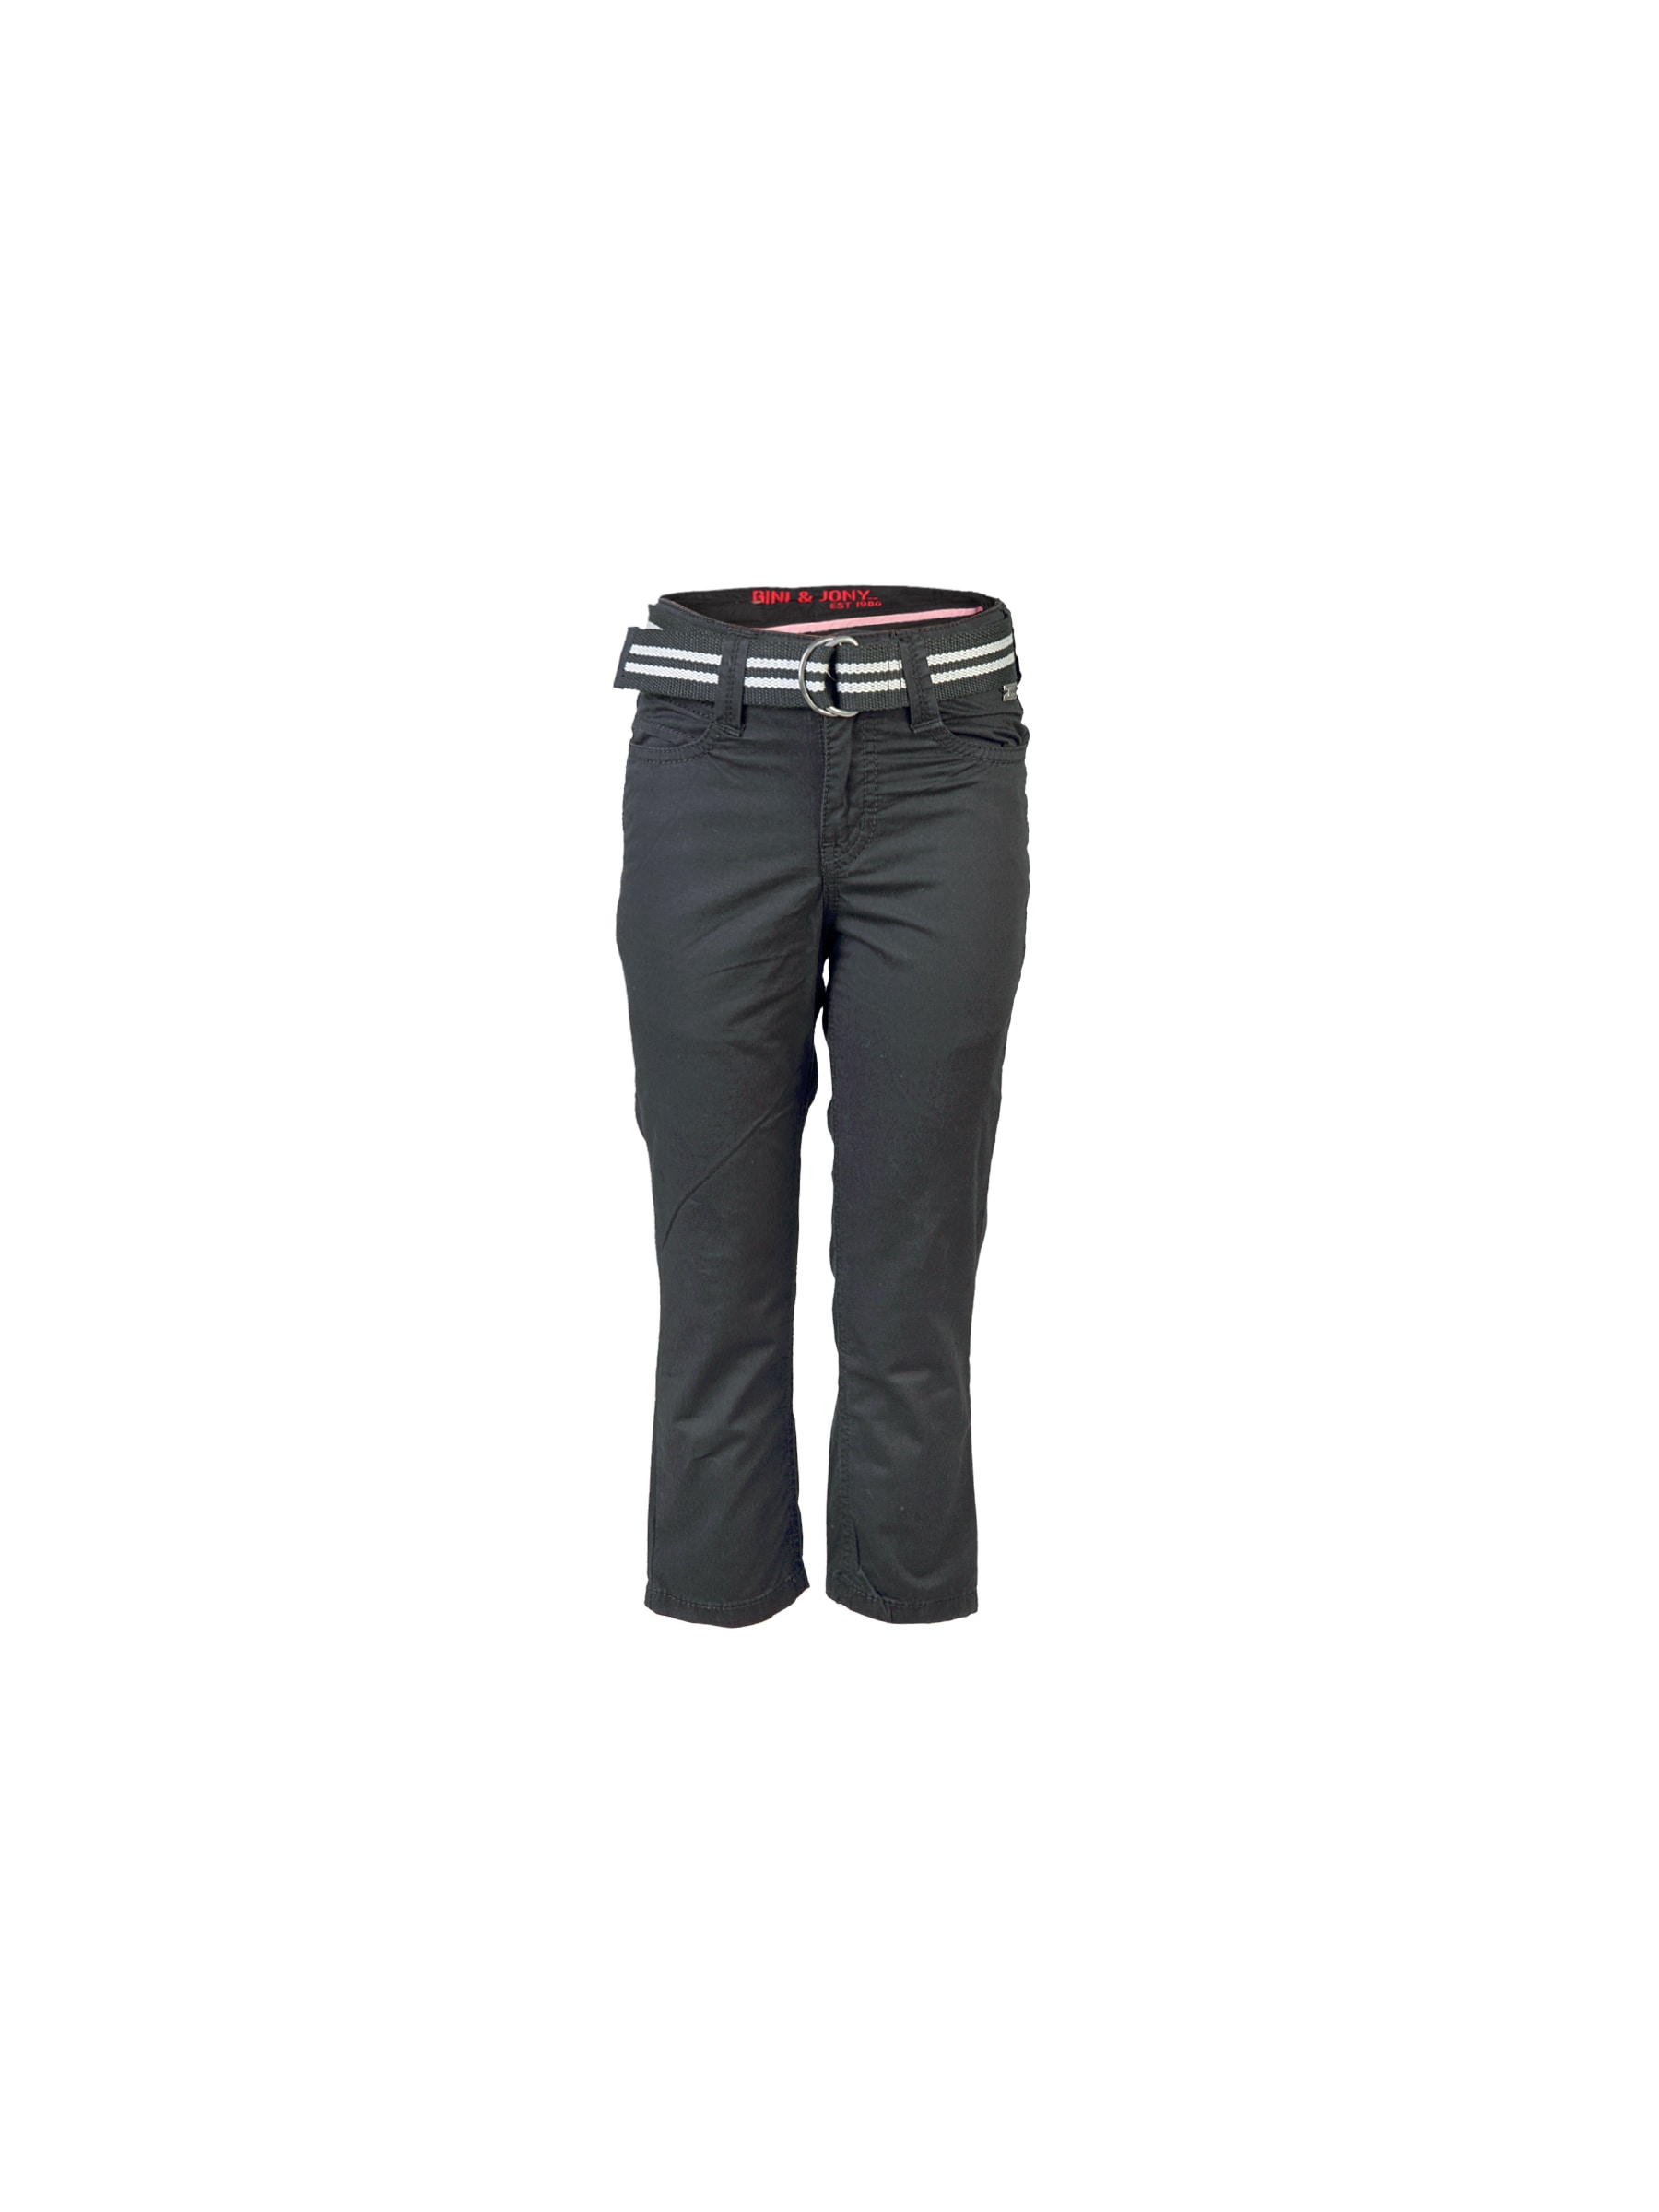

Product Title:  Gini and Jony Kids Solid Black Trousers
Euclidean Distance from input image: 28.43107


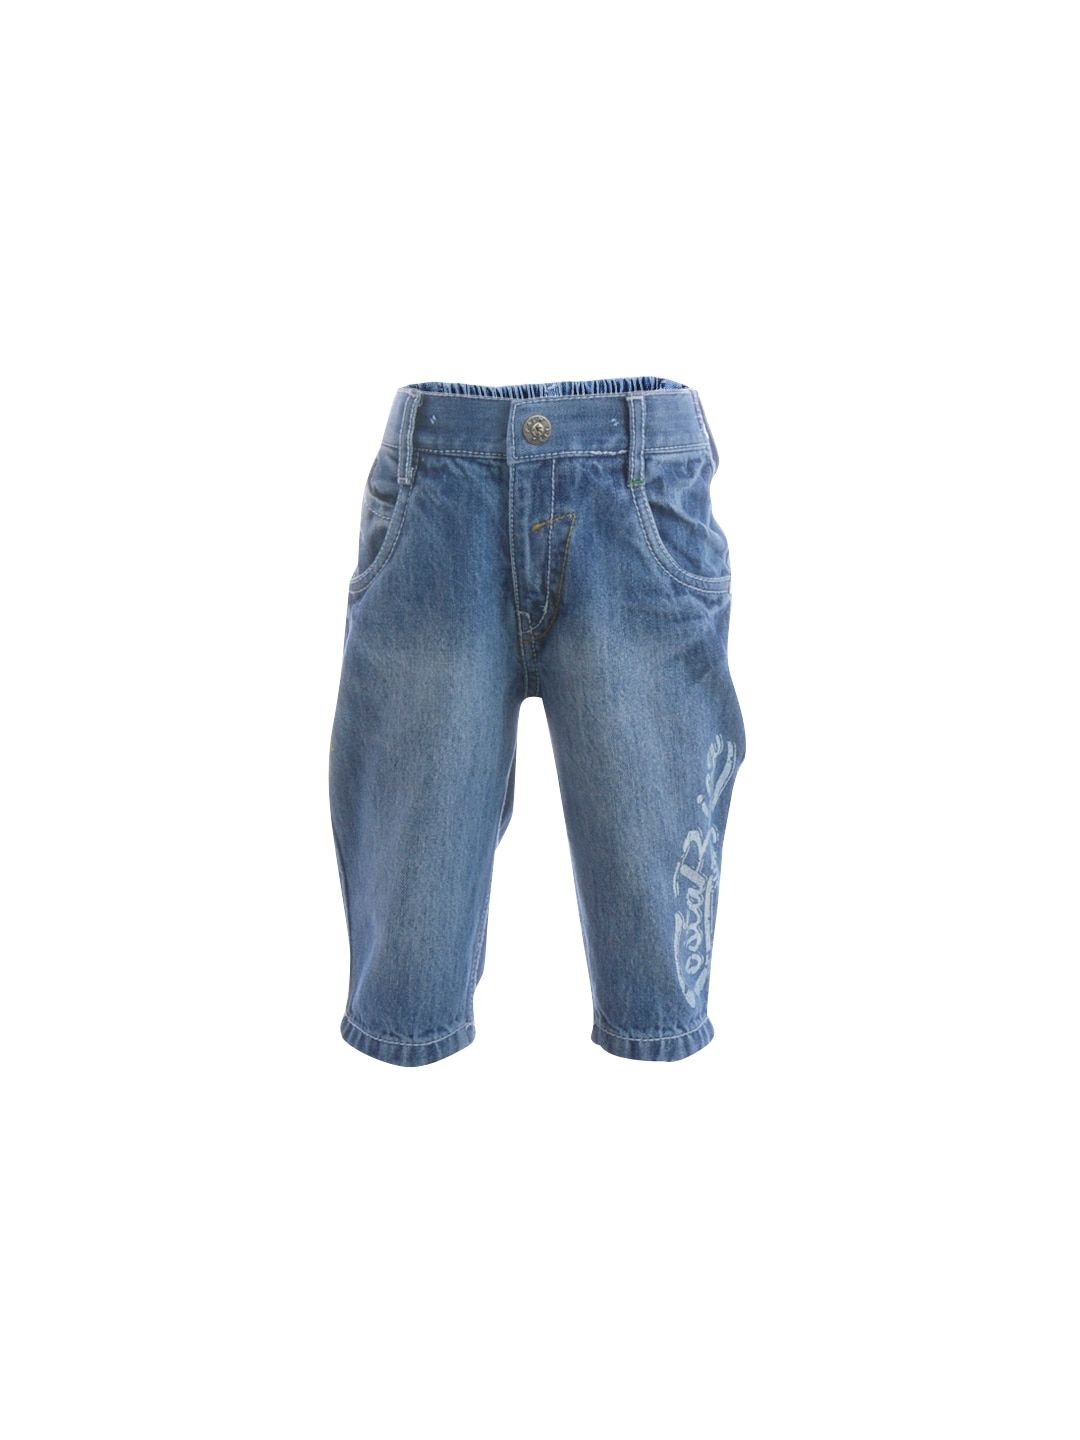

Product Title:  Palm Tree Boys Washed Blue 3/4 Length Pants
Euclidean Distance from input image: 28.973797


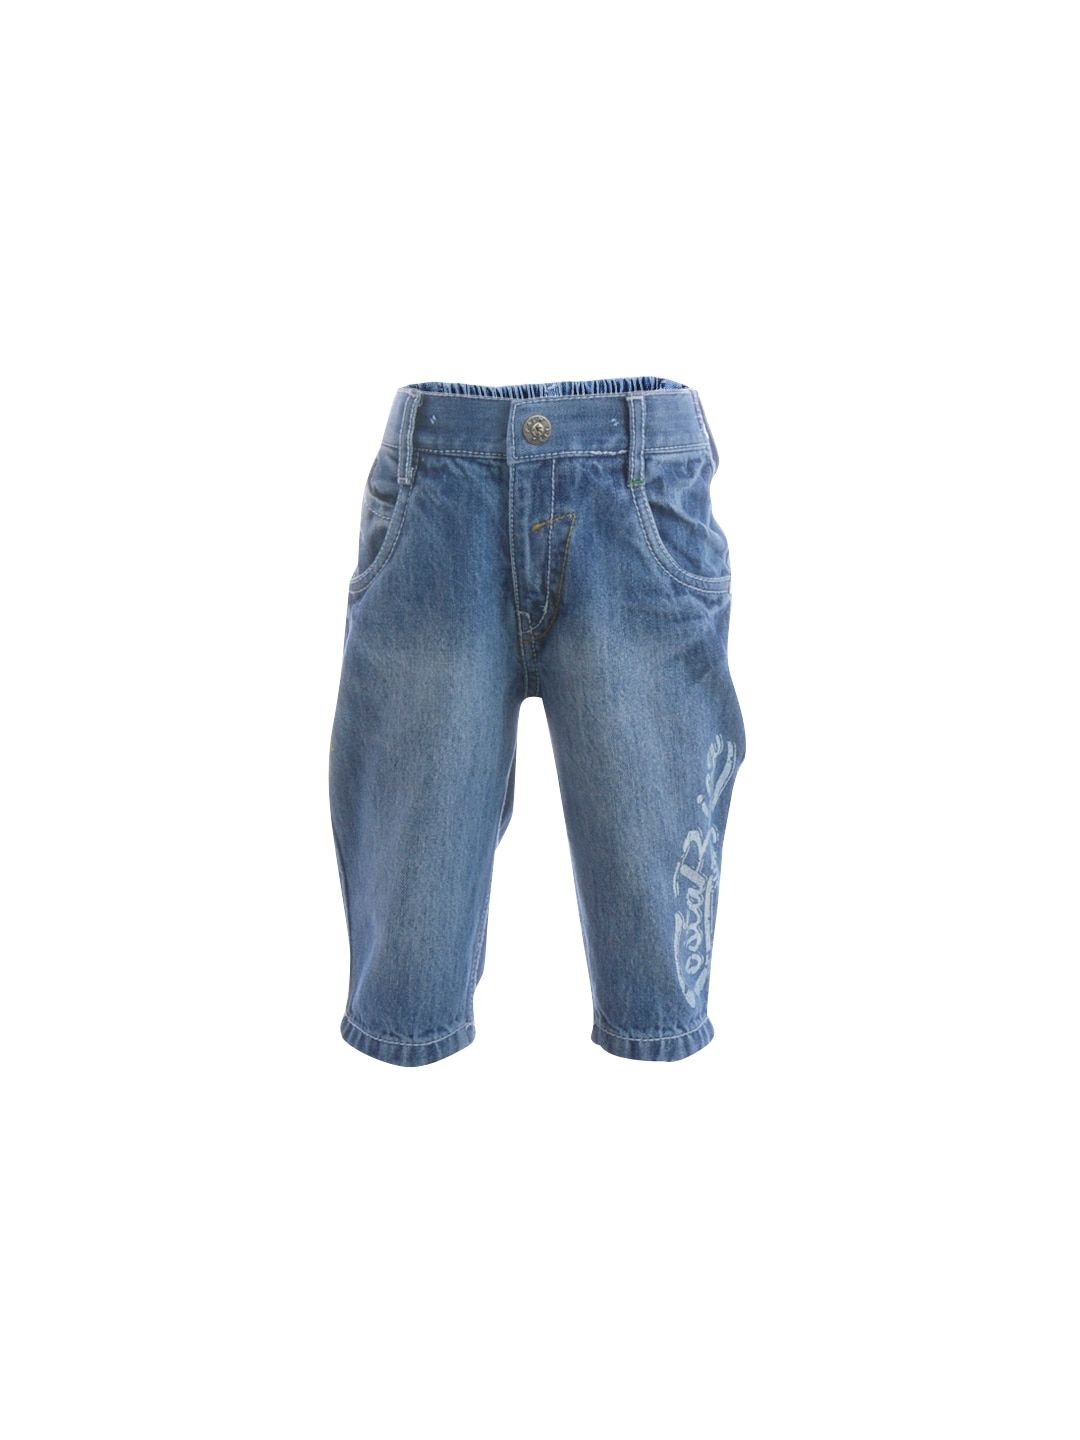

Product Title:  Palm Tree Boys Washed Blue 3/4 Length Pants
Euclidean Distance from input image: 28.973797


In [ ]:
get_similar_products_cnn('18181', 5)

==================== input product details ====================


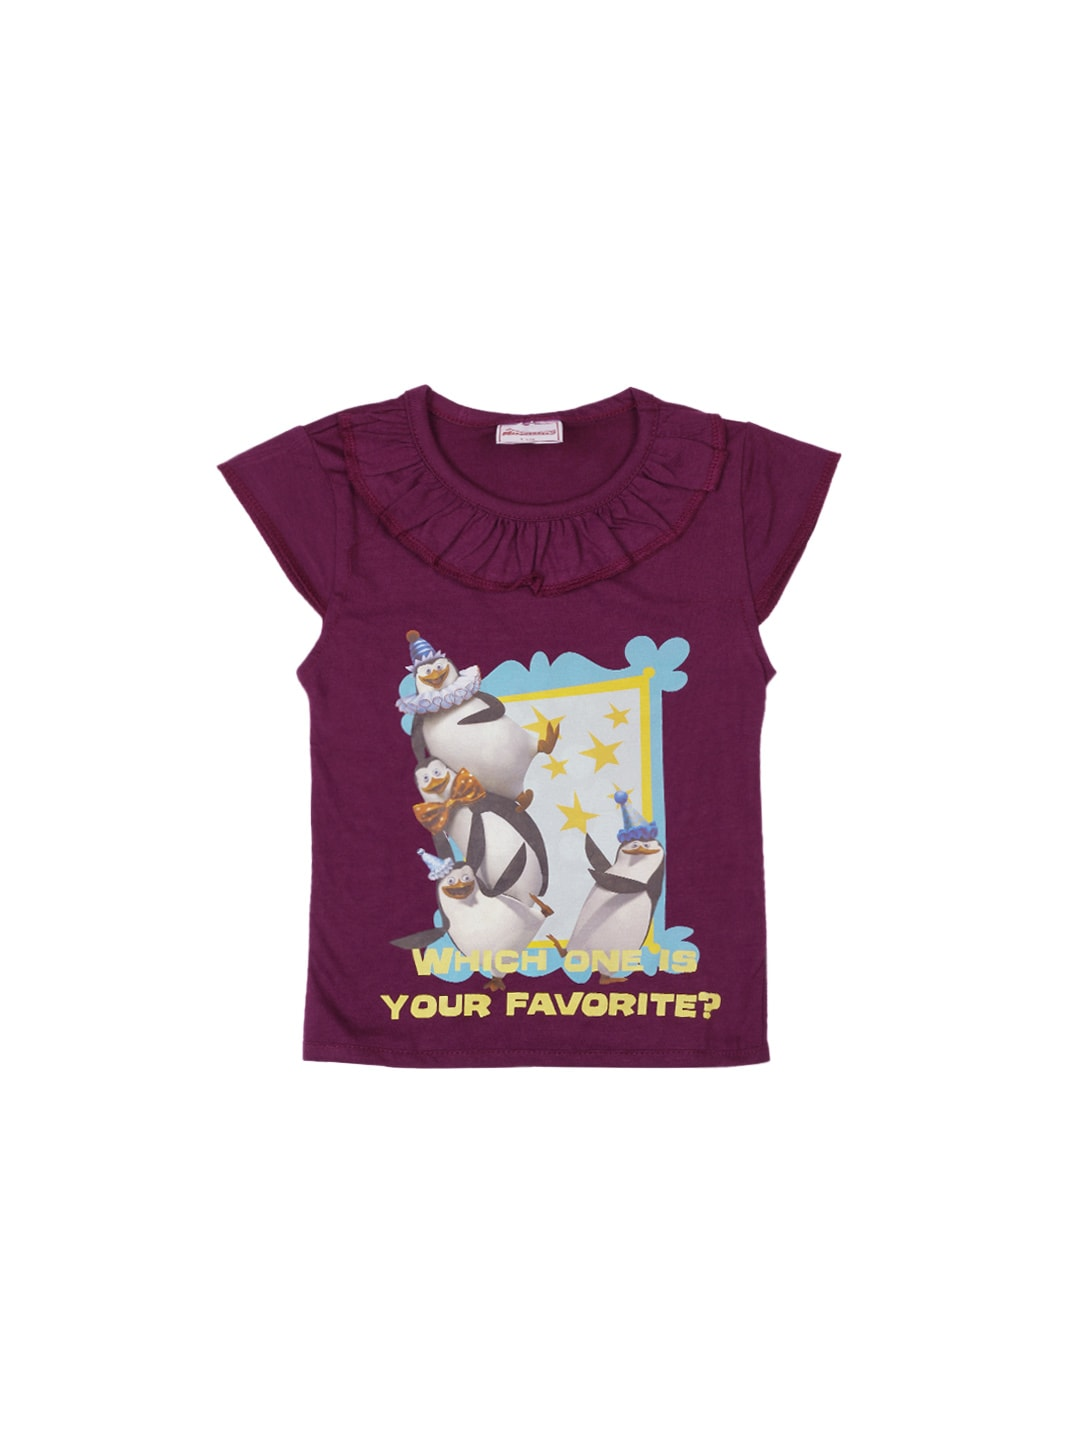

Product Title:  Madagascar3 Girls Purple Printed T-Shirt

 ==================== Recommended products ====================


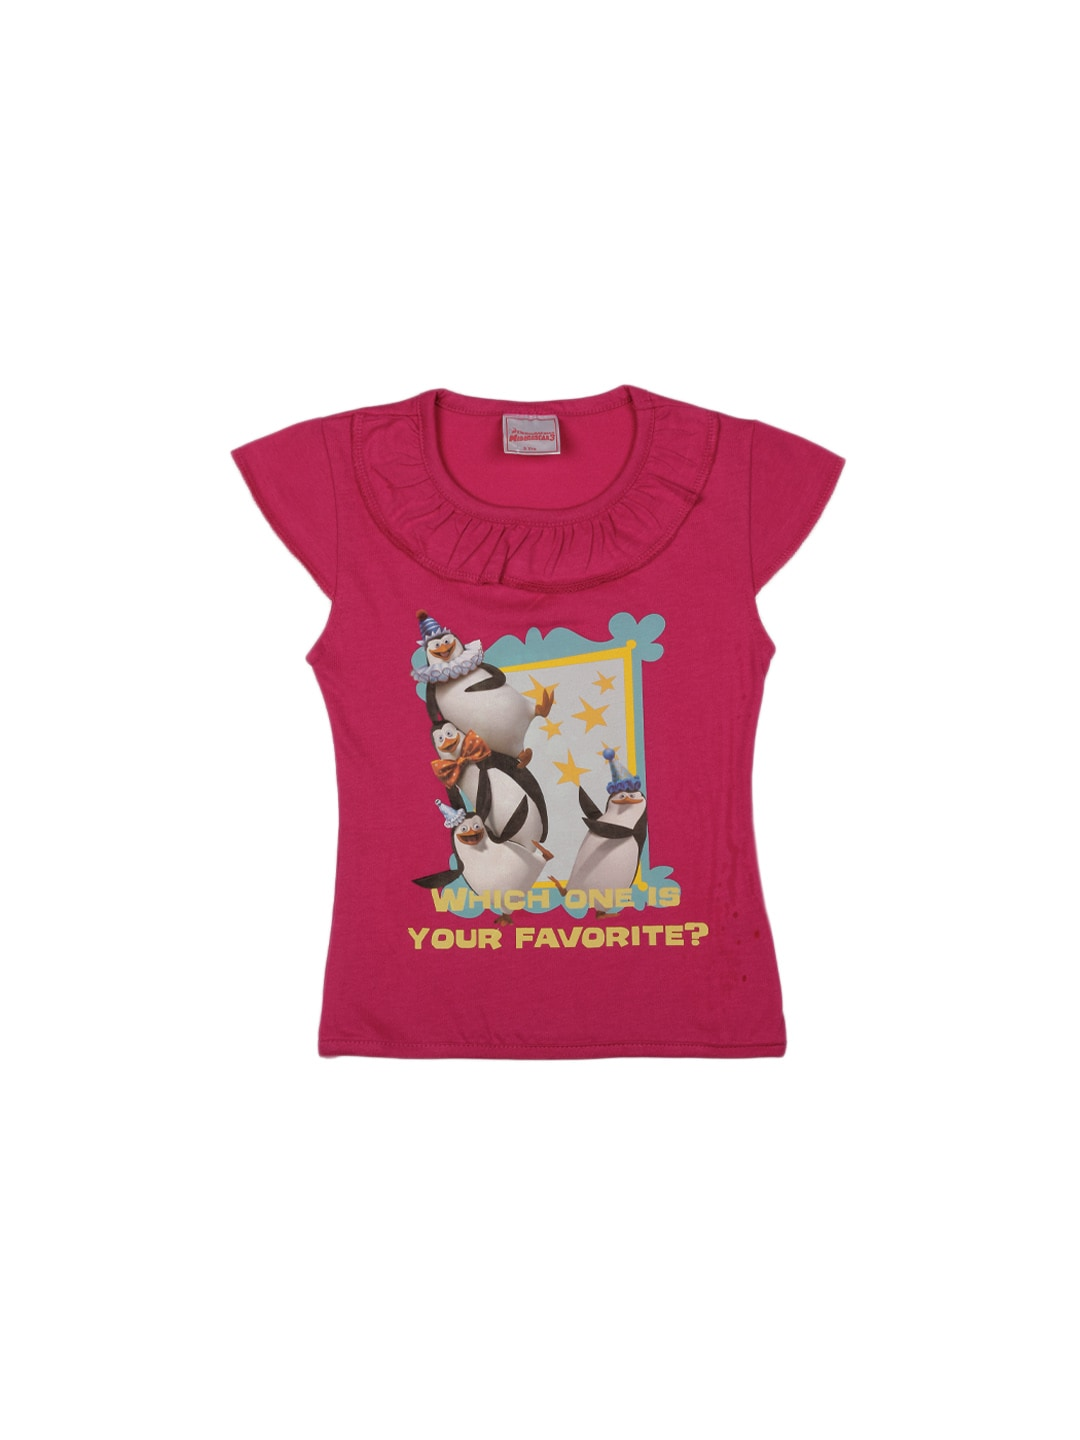

Product Title:  Madagascar3 Girls Pink Printed T-Shirt
Euclidean Distance from input image: 24.715086


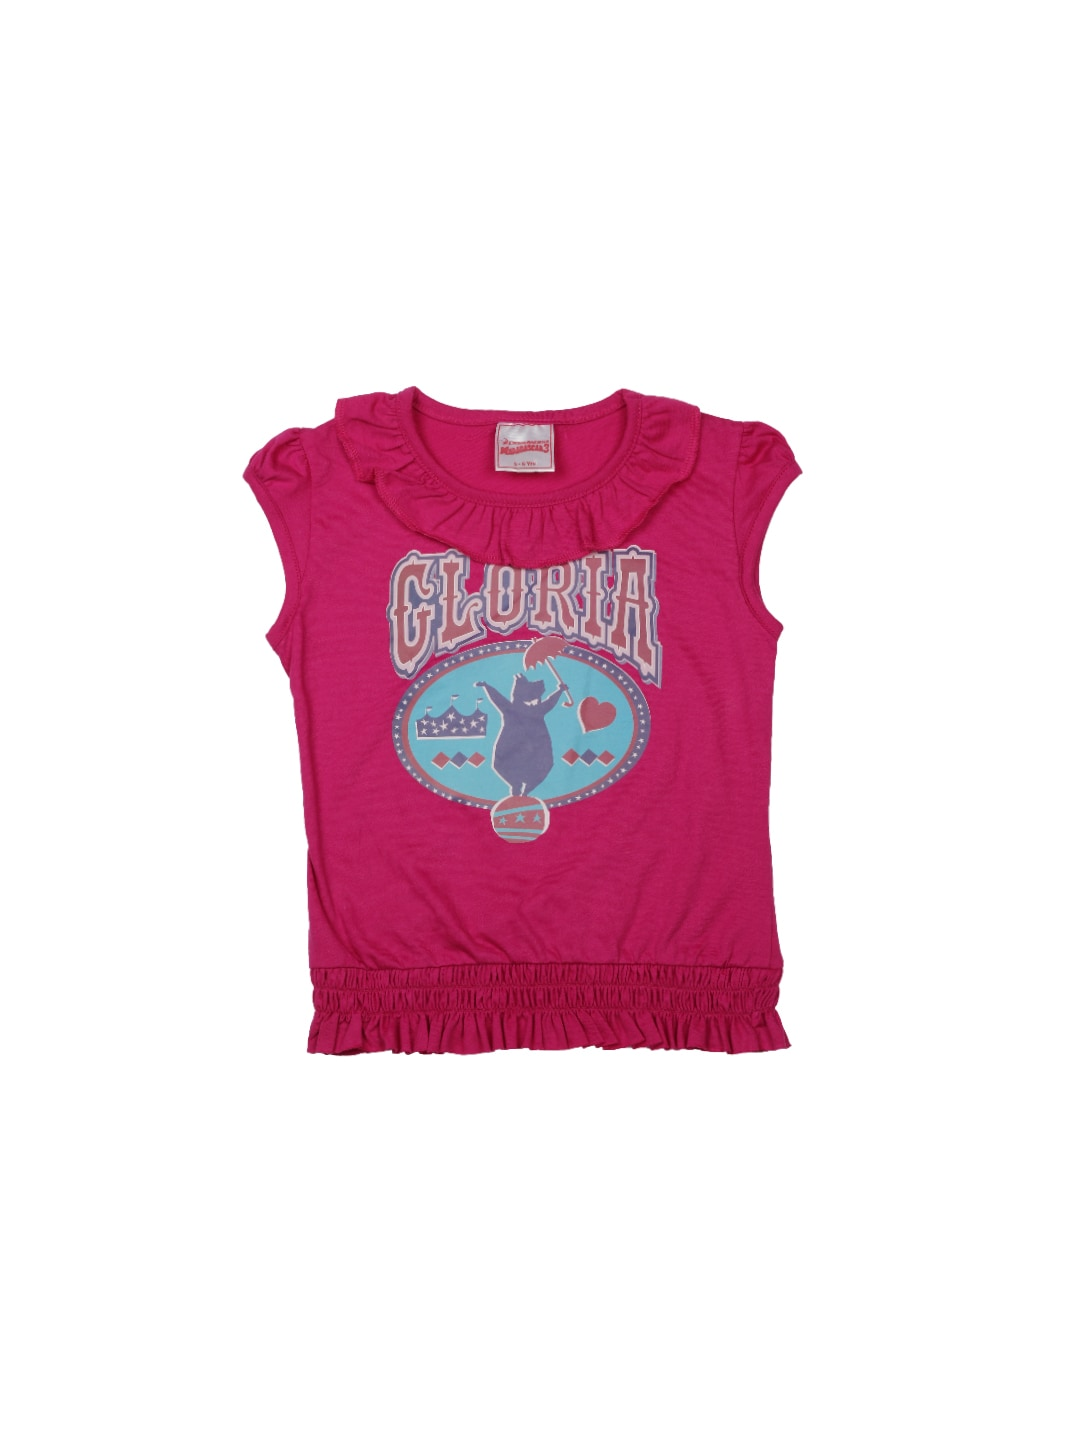

Product Title:  Madagascar3 Girls Pink Printed T-Shirt
Euclidean Distance from input image: 32.679398


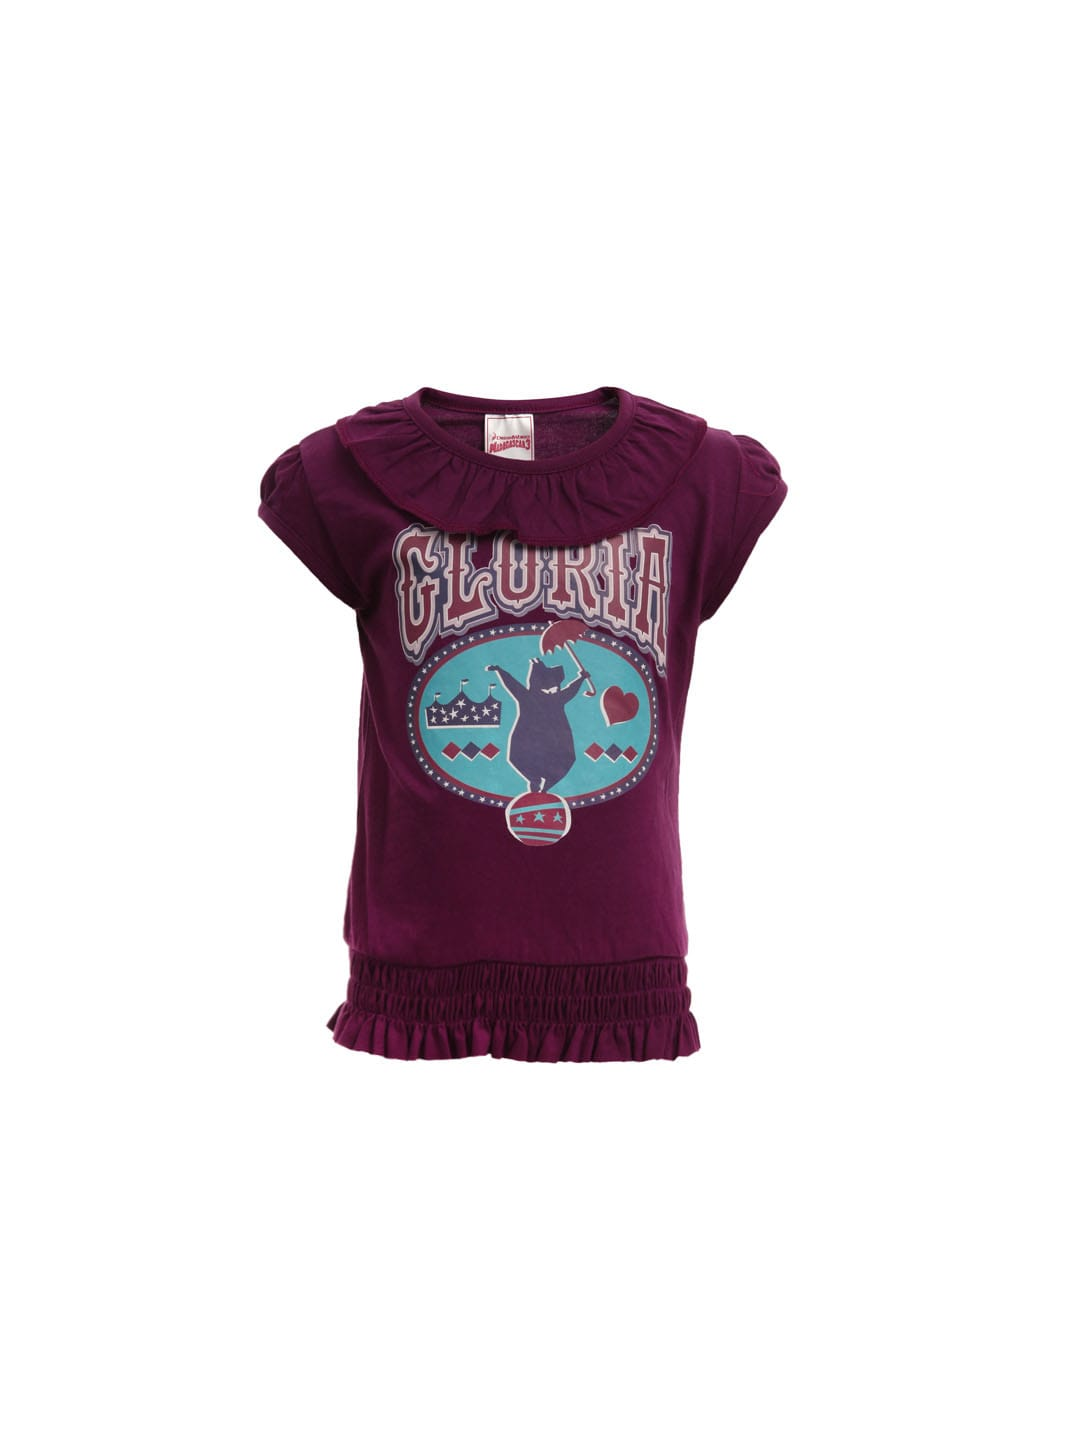

Product Title:  Madagascar3 Girls Purple Printed T-Shirt
Euclidean Distance from input image: 35.671


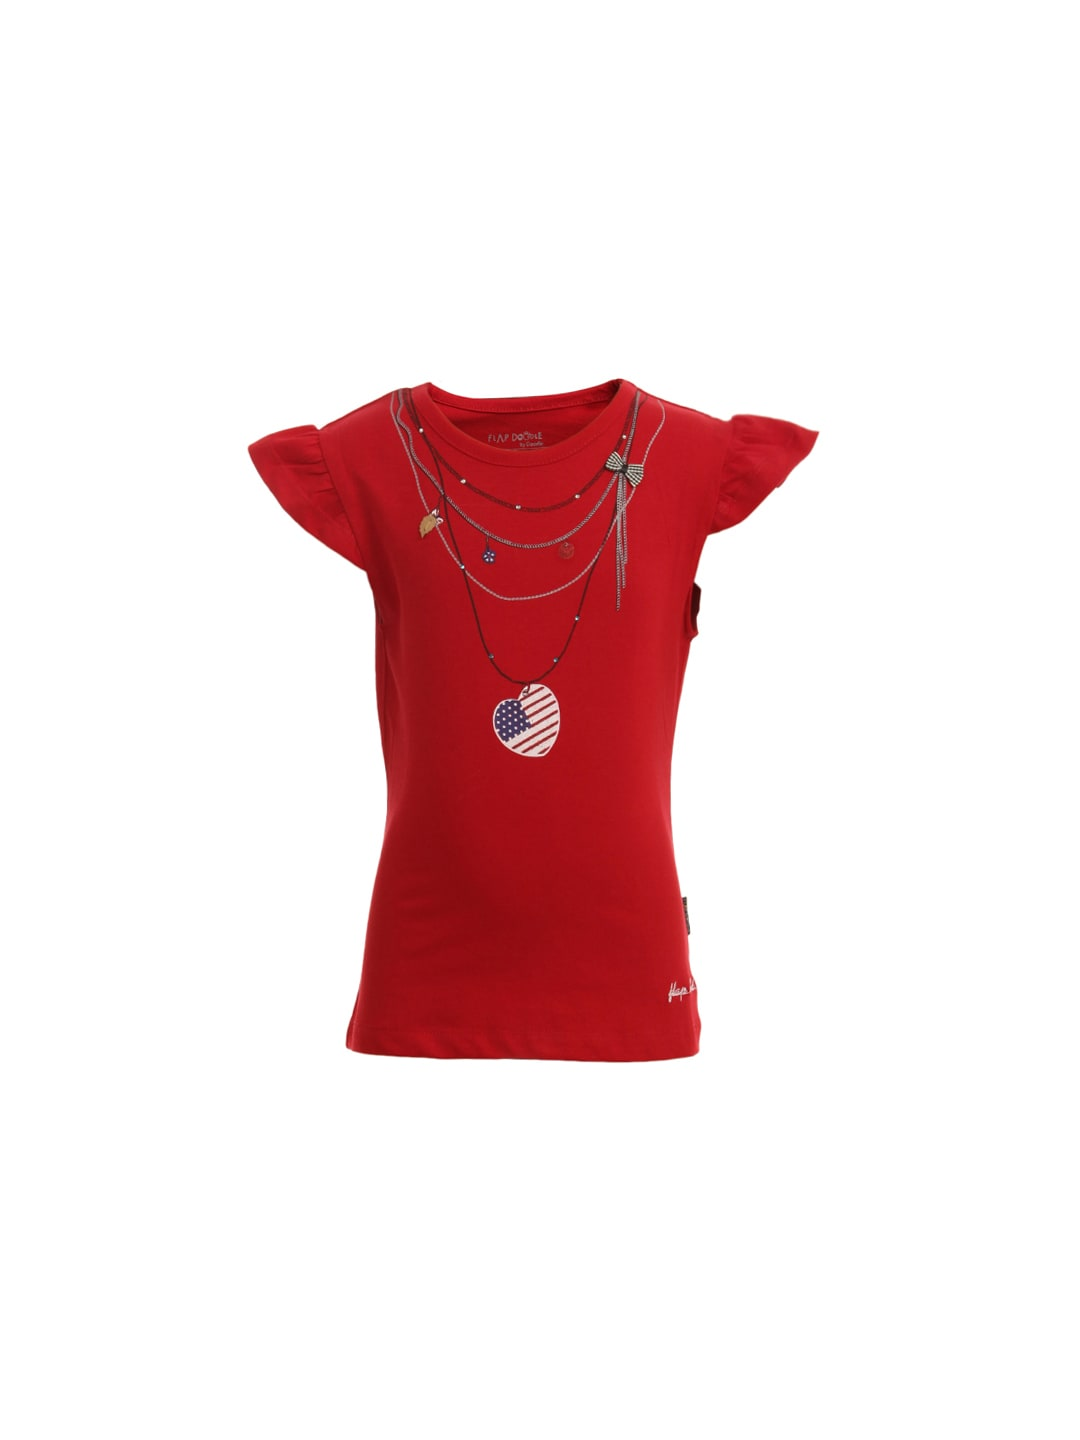

Product Title:  Doodle Girls Red Printed Top
Euclidean Distance from input image: 35.865276


In [ ]:
get_similar_products_cnn('37633', 5)